To run: Right-click ACM_data folder in main drive folder and click create shortcut. Then you will be able to run all cells.

In [125]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import requests
import plotly.graph_objects as go
import urllib
from urllib import request as ulreq
from io import StringIO
from PIL import Image, ImageFile
countries = ['australia',
                           'canada',
 'france',
 'italy',
 'japan',
 'new zealand',
 'spain',
 'uk',
 'usa']
import sys
print(sys.version)

3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]


In [126]:
!mkdir graphs

mkdir: cannot create directory ‘graphs’: File exists


In [127]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [128]:
public ='/content/drive/MyDrive/ACM_data/public/' 
top100 ='/content/drive/MyDrive/ACM_data/top100/'

In [129]:
countries

['australia',
 'canada',
 'france',
 'italy',
 'japan',
 'new zealand',
 'spain',
 'uk',
 'usa']

In [130]:
# public 

# data loading
dfs = {}
for country in countries:
    summary = pd.read_csv(public + country+"_summary.csv")
    to_remove = summary[summary["final_url"].isnull()]["URL"].tolist()
    summary = summary[summary["final_url"].str.len() > 1]
    aggregate = pd.read_csv(public + country+"_aggregate.csv")
    aggregate = aggregate[~(aggregate["URL"].isin(to_remove))]
    details = pd.read_csv(public + country+"_details.csv")
    urlCount = summary.shape[0]
    dfs[country] = {"summary" : summary, "aggregate": aggregate, "details" : details, "urlCount" : urlCount}
    
#     Top 100
dfs_top = {}
for country in countries:
    summary_top = pd.read_csv(top100 + country+"_summary.csv")
    to_remove2 = summary_top[summary_top["final_url"].isnull()]["URL"].tolist()
    to_remove2+= summary_top[summary_top["final_url"].str.len() > 1].iloc[100:]["final_url"].to_list()
    summary_top = (summary_top[summary_top["final_url"].str.len() > 1]).head(100)
    aggregate_top = pd.read_csv(top100 + country+"_aggregate.csv")
    aggregate_top = aggregate_top[~(aggregate_top["URL"].isin(to_remove2))]
    details_top = pd.read_csv(top100 + country+"_details.csv")

    urlCount2 = summary_top.shape[0]
    dfs_top[country] = {"summary" : summary_top, "aggregate": aggregate_top, "details" : details_top, "urlCount" : urlCount2}


# dfs_dev = {}
# for country in developed_countries:
#     summary = pd.read_csv(public + country+"_summary.csv")
#     to_remove = summary[summary["final_url"].isnull()]["URL"].tolist()
#     summary = summary[summary["final_url"].str.len() > 1]
#     aggregate = pd.read_csv(public + country+"_aggregate.csv")
#     aggregate = aggregate[~(aggregate["URL"].isin(to_remove))]
#     details = pd.read_csv(public + country+"_details.csv")
#     urlCount = summary.shape[0]
#     dfs_dev[country] = {"summary" : summary, "aggregate": aggregate, "details" : details, "urlCount" : urlCount}
    
# #     Top 100
# dfs_top_dev = {}
# for country in developed_countries:
#     summary_top = pd.read_csv(top100 + country+"_summary.csv")
#     to_remove2 = summary_top[summary_top["final_url"].isnull()]["URL"].tolist()
#     summary_top = summary_top[summary_top["final_url"].str.len() > 1]
#     aggregate_top = pd.read_csv(top100 + country+"_aggregate.csv")
#     aggregate_top = aggregate_top[~(aggregate_top["URL"].isin(to_remove2))]
#     details_top = pd.read_csv(top100 + country+"_details.csv")
#     urlCount2 = summary_top.shape[0]
#     dfs_top_dev[country] = {"summary" : summary_top, "aggregate": aggregate_top, "details" : details_top, "urlCount" : urlCount2}


    

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (97) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (96,97) have mixed types.Specify dtype option on import or set low_memory=False.



In [131]:
# dfs_top_dev["new zealand"]["details"]
all_countries_urls = []
for country in countries:
  for x in list(dfs_top[country]["summary"]["final_url"]):
    all_countries_urls.append(x)
print(len(set(all_countries_urls)))

556


In [132]:
print("URL count for public")

for country in countries:
    print(country , ":", dfs[country]["urlCount"])
   
print("\nURL count for top 100")
    
for country in countries:
    print(country,dfs_top[country]["urlCount"])

URL count for public
australia : 95
canada : 125
france : 100
italy : 94
japan : 168
new zealand : 162
spain : 140
uk : 93
usa : 85

URL count for top 100
australia 100
canada 100
france 100
italy 100
japan 100
new zealand 100
spain 100
uk 100
usa 100


In [133]:
avg_page_sizes = []
errors = []
avg_page_sizes2 = []
errors2 = []
for country in countries:
    temp = dfs[country]["summary"]["bytesIn"]/(1024*1024)
    temp2 = dfs_top[country]["summary"]["bytesIn"]/(1024*1024)
    # for i,t in dfs[country]["summary"].iterrows():
    #   if t["bytesIn"]> 150000000:
    #     print(t["final_url"])
    mean = temp.mean()
    sigma = temp.std()
    avg_page_sizes.append(mean)
    
    mean2 = temp2.mean()
    sigma2 = temp2.std()
    avg_page_sizes2.append(mean2)
    
    
    # conf_int = stats.t.interval(0.95, mean,loc=mean, scale=sigma/np.sqrt(len(temp)))
    # conf_int2 = stats.t.interval(0.95, mean2,loc=mean2, scale=sigma2/np.sqrt(len(temp2)))
    errors.append(1.96*sigma/np.sqrt(len(temp)))
    errors2.append(1.96*sigma2/np.sqrt(len(temp2)))
    
    # errors.append((conf_int[1]-conf_int[0])/2)
    # errors2.append((conf_int2[1]-conf_int2[0])/2)
    
print("Average Page Sizes of Countries for Public and Top 100")

page_size_df = pd.DataFrame(zip(avg_page_sizes,avg_page_sizes2), index=countries, columns=["Public","Top 100"])
page_size_df

Average Page Sizes of Countries for Public and Top 100


,Public,Top 100
australia,2.968279,2.711840
canada,2.766838,1.953724
france,1.936021,2.013093
italy,3.477388,2.002524
japan,3.000105,2.555557
new zealand,2.202303,2.618401
spain,2.906471,3.665585
uk,2.005744,1.884796
usa,2.572600,2.356969


In [134]:
diff = page_size_df["Public"] - page_size_df["Top 100"]
diff.mean() 

0.23036204965286503

In [135]:
page_size_df["Public"].mean()

2.6484165296757194

In [136]:
errors

[0.7945977003133818,
 0.565551323737924,
 0.302213421591116,
 0.6723691501185809,
 0.7362317912889723,
 0.36759462543211247,
 0.773154998887001,
 0.3399451941927623,
 0.9261259627884686]

In [137]:
errors2

[0.46044370041790056,
 0.3267273916119789,
 0.355922627348635,
 0.42242011650420946,
 0.4970032418940769,
 0.7890771112738465,
 1.3627535491453209,
 0.29440192362550277,
 0.40177113559926525]

In [138]:
plt.rcParams.update({'font.size': 15})

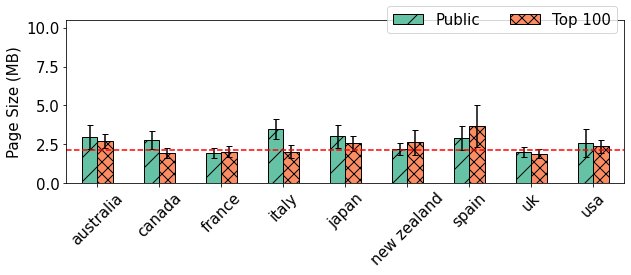

In [139]:
palette = sns.color_palette("Set2")
ax = page_size_df.plot(kind="bar",  color=palette, yerr=[errors,errors2], rot=45, ylim=(0,10.5), figsize=(10,3), capsize=3, edgecolor="black")
plt.axhline(y=2.15, color='r', linestyle='--' )

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(page_size_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_ylabel("Page Size (MB)")
ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=2)
plt.savefig("graphs/page_size.png", bbox_inches = 'tight')
plt.savefig("graphs/page_size.eps", bbox_inches = 'tight')

In [140]:
# # public = pd.DataFrame()
# # top = pd.DataFrame()
# # public_dev = pd.DataFrame()
# # top_dev = pd.DataFrame()
# temp = []
# temp2 = []
# temp3 = []
# temp4 = []
# for country in all_countries:
#     if country in countries:
#       temp+= (dfs[country]["summary"]["bytesIn"]/(1024*1024)).to_list()
#       temp2+= (dfs_top[country]["summary"]["bytesIn"]/(1024*1024)).to_list()
#       print(country)
#     else:
#       temp3+= (dfs[country]["summary"]["bytesIn"]/(1024*1024)).to_list()
#       temp4+= (dfs_top[country]["summary"]["bytesIn"]/(1024*1024)).to_list()
#       print("d", country)

# # thresh = 50
# # temp = [t for t in temp if t <thresh]
# # temp2 = [t for t in temp2 if t <thresh]
# # temp3 = [t for t in temp3 if t <thresh]
# # temp4 = [t for t in temp4 if t <thresh]
# public = pd.DataFrame(temp, columns=["MBs"])
# top = pd.DataFrame(temp2,  columns=["MBs"])
# public_dev = pd.DataFrame(temp3, columns=["MBs"])
# top_dev = pd.DataFrame(temp4, columns=["MBs"])
# top_dev

In [141]:
# fig, ax = plt.subplots(1, 1)
# stats_df = top \
# .groupby('MBs') \
# ['MBs'] \
# .agg('count') \
# .pipe(pd.DataFrame) \
# .rename(columns = {'MBs': 'frequency'})

# # PDF
# stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# # CDF
# stats_df['cdf'] = stats_df['pdf'].cumsum()
# # stats_df = stats_df.reset_index()
# stats_df.plot(x = 'MBs', y = ['cdf'], grid = True,ax=ax)



# stats_df = public \
# .groupby('MBs') \
# ['MBs'] \
# .agg('count') \
# .pipe(pd.DataFrame) \
# .rename(columns = {'MBs': 'frequency'})

# # PDF
# stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# # CDF
# stats_df['cdf'] = stats_df['pdf'].cumsum()
# stats_df = stats_df.reset_index()
# stats_df.plot(x = 'MBs', y = ['cdf'], grid = True,ax=ax)


# stats_df = top_dev \
# .groupby('MBs') \
# ['MBs'] \
# .agg('count') \
# .pipe(pd.DataFrame) \
# .rename(columns = {'MBs': 'frequency'})

# # PDF
# stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# # CDF
# stats_df['cdf'] = stats_df['pdf'].cumsum()
# stats_df = stats_df.reset_index()
# stats_df.plot(x = 'MBs', y = ['cdf'], grid = True,ax=ax)



# stats_df = public_dev \
# .groupby('MBs') \
# ['MBs'] \
# .agg('count') \
# .pipe(pd.DataFrame) \
# .rename(columns = {'MBs': 'frequency'})

# # PDF
# stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# # CDF
# stats_df['cdf'] = stats_df['pdf'].cumsum()
# stats_df = stats_df.reset_index()
# stats_df.plot(x = 'MBs', y = ['cdf'], grid = True,ax=ax)

# ax.legend(['Developing Top 100','Developing Public', 'Developed Top 100', 'Developed Public']);
# ax.set_xlabel("Page Size (MB)")

# plt.savefig("graphs/cdf.png", bbox_inches = 'tight')
# plt.savefig("graphs/cdf.eps", bbox_inches = 'tight')

### **Sizes of Different Objects**

Public Sites

In [142]:
mean_bytes=[]
country_name=[]
for country in countries:
        country_name=country
        html=(dfs[country]["summary"]["bytes.html"]/(1024*1024)).mean()
        js=(dfs[country]["summary"]["bytes.js"]/(1024*1024)).mean()
        css=(dfs[country]["summary"]["bytes.css"]/(1024*1024)).mean()
        flash=(dfs[country]["summary"]["bytes.flash"]/(1024*1024)).mean()
        font=(dfs[country]["summary"]["bytes.font"]/(1024*1024)).mean()
        image=(dfs[country]["summary"]["bytes.image"]/(1024*1024)).mean()
        other=(dfs[country]["summary"]["bytes.other"]/(1024*1024)).mean()
        video=(dfs[country]["summary"]["bytes.video"]/(1024*1024)).mean()
#         mean_bytes.extend(html,js,css,flash,font,image,other,video)
        d = {'Country':country_name,'M Bytes in html':html, 'M Bytes in js': js, 'M Bytes in Css':css,'M Bytes in flash':flash,'M Bytes in font':font,'M Bytes in Image': image,'M Bytes in other':other, 'M Bytes in video':video}
        mean_bytes.append(d)
                                                   
df_average = pd.DataFrame(mean_bytes)
df_average
#         mean_bytes.append(dfs[country]["summary"][["bytes.html","bytes.js","bytes.css","bytes.image","bytes.flash","bytes.font","bytes.video","bytes.other"]].mean())
# temp=dfs[country]["summary"][["bytes.html"]].mean()
# temp


,Country,M Bytes in html,M Bytes in js,M Bytes in Css,M Bytes in flash,M Bytes in font,M Bytes in Image,M Bytes in other,M Bytes in video
0,australia,0.075183,0.822920,0.137886,0.0,0.131751,1.660589,0.042690,0.091899
1,canada,0.056104,0.771160,0.213620,0.0,0.106498,1.183929,0.048503,0.382829
2,france,0.060717,0.391716,0.071539,0.0,0.148459,1.233566,0.022370,0.005802
3,italy,0.073562,0.864720,0.210354,0.0,0.115597,2.101253,0.029969,0.080753
4,japan,0.044188,0.564774,0.104910,0.0,0.110115,1.948332,0.158009,0.054341
5,new zealand,0.029351,0.564776,0.079215,0.0,0.220154,0.797180,0.337024,0.172012
6,spain,0.062844,0.598547,0.239212,0.0,0.083536,1.783202,0.009395,0.124326
7,uk,0.049957,0.484474,0.080854,0.0,0.096605,1.284364,0.006601,0.000000
8,usa,0.061278,0.787258,0.140470,0.0,0.581150,0.917265,0.071886,0.009095


In [143]:
labels = ['html', 'js', 'css', 'image','flash','font','video','other']
# labels.sort()
for country,ind in zip(countries,df_average.index):
    sizes=(df_average['M Bytes in html'][ind], df_average['M Bytes in js'][ind],
    df_average['M Bytes in Css'][ind],df_average['M Bytes in Image'][ind],
    df_average['M Bytes in flash'][ind],df_average['M Bytes in font'][ind],
    df_average['M Bytes in video'][ind],df_average['M Bytes in other'][ind])
    fig = px.pie(df_average, values=sizes, names=labels, title=country)
#     color_discrete_map={'js': '#d62728',
#                         'html':'#ff7f0e',
#                         'font':'#9467bd',
#                         'css':'#2ca02c',
#                         'image':'#1f77b4',
#                         'other':'#17becf',
#                         'video': '#e377c2',
#                         'flash': '#bcbd22'}
    fig.show()

Top 100

In [144]:
mean_bytes=[]
country_name=[]
for country in countries:
        country_name=country
        html=(dfs_top[country]["summary"]["bytes.html"]/(1024*1024)).mean()
        js=(dfs_top[country]["summary"]["bytes.js"]/(1024*1024)).mean()
        css=(dfs_top[country]["summary"]["bytes.css"]/(1024*1024)).mean()
        flash=(dfs_top[country]["summary"]["bytes.flash"]/(1024*1024)).mean()
        font=(dfs_top[country]["summary"]["bytes.font"]/(1024*1024)).mean()
        image=(dfs_top[country]["summary"]["bytes.image"]/(1024*1024)).mean()
        other=(dfs_top[country]["summary"]["bytes.other"]/(1024*1024)).mean()
        video=(dfs_top[country]["summary"]["bytes.video"]/(1024*1024)).mean()
#         mean_bytes.extend(html,js,css,flash,font,image,other,video)
        d = {'Country':country_name,'M Bytes in html':html, 'M Bytes in js': js, 'M Bytes in Css':css,'M Bytes in flash':flash,'M Bytes in font':font,'M Bytes in Image': image,'M Bytes in other':other, 'M Bytes in video':video}
        mean_bytes.append(d)
                                                   
df_average2 = pd.DataFrame(mean_bytes)
df_average2
#         mean_bytes.append(dfs[country]["summary"][["bytes.html","bytes.js","bytes.css","bytes.image","bytes.flash","bytes.font","bytes.video","bytes.other"]].mean())
# temp=dfs[country]["summary"][["bytes.html"]].mean()
# temp


,Country,M Bytes in html,M Bytes in js,M Bytes in Css,M Bytes in flash,M Bytes in font,M Bytes in Image,M Bytes in other,M Bytes in video
0,australia,0.097222,1.166079,0.068992,0.0,0.135801,0.912881,0.066905,0.261831
1,canada,0.058996,0.946291,0.062240,0.0,0.119991,0.570537,0.035082,0.155829
2,france,0.074351,0.739374,0.071466,0.0,0.103418,0.847446,0.040554,0.134717
3,italy,0.075289,0.756737,0.079575,0.0,0.108310,0.923673,0.040538,0.015400
4,japan,0.077630,1.020016,0.066749,0.0,0.094382,1.030309,0.074685,0.186079
5,new zealand,0.076014,0.945449,0.061962,0.0,0.161661,0.705422,0.044673,0.617827
6,spain,0.102211,0.823516,0.117591,0.0,0.132291,1.409137,0.043865,1.035229
7,uk,0.076539,0.838861,0.059147,0.0,0.093759,0.667574,0.041544,0.099967
8,usa,0.100198,1.191816,0.062754,0.0,0.120538,0.618459,0.042653,0.215724


In [145]:
labels = ['html', 'js', 'css', 'image','flash','font','video','other']
labels.sort()
for country,ind in zip(countries,df_average.index):
    sizes=(df_average2['M Bytes in html'][ind], df_average2['M Bytes in js'][ind],
    df_average2['M Bytes in Css'][ind],df_average2['M Bytes in Image'][ind],
    df_average2['M Bytes in flash'][ind],df_average2['M Bytes in font'][ind],
    df_average2['M Bytes in video'][ind],df_average2['M Bytes in other'][ind])
    fig = px.pie(df_average2, values=sizes, names=labels, title=country)
    fig.show()

In [146]:
df_average3 = df_average.mean().to_frame().rename(columns={0:"Public Service"}).merge(df_average2.mean().to_frame().rename(columns={0:"Top 100"}), left_index=True, right_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [147]:
std_dist = df_average.std().to_frame().rename(columns={0:"Public Service"}).merge(df_average2.std().to_frame().rename(columns={0:"Top 100"}), left_index=True, right_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [148]:
std_dist.index = std_dist.index.str.replace('M Bytes in ', '')
std_dist.index = std_dist.index.str.lower()
std_dist
std_dist

,Public Service,Top 100
html,0.014362,0.014529
js,0.166136,0.165271
css,0.064510,0.018093
flash,0.000000,0.000000
font,0.156714,0.022029
image,0.458353,0.259877
other,0.106530,0.013443
video,0.120093,0.322523


In [149]:
df_average3["Public Service"] = df_average3["Public Service"]/df_average3["Public Service"].sum()*100
df_average3["Top 100"] = df_average3["Top 100"]/df_average3["Top 100"].sum()*100
df_average3 = df_average3.rename({"Public Service" : "Public"}, axis=1)

In [150]:
df_average3.index = df_average3.index.str.replace('M Bytes in ', '')
df_average3.index = df_average3.index.str.lower()
df_average3

,Public,Top 100
html,2.156896,3.398961
js,24.588890,38.793305
css,5.371661,2.994035
flash,0.000000,0.000000
font,6.698984,4.925725
image,54.259136,35.374771
other,3.053242,1.981515
video,3.871191,12.531687


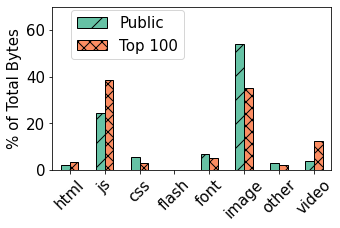

In [151]:
# palette = sns.color_palette("pastel")
palette = sns.color_palette("Set2")


ax = df_average3.plot(kind="bar",rot=45, ylabel="% of Total Bytes",color=palette, edgecolor="black", ylim=(0,70), figsize=(5,3))

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(df_average3))]


for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.legend(loc='center right', bbox_to_anchor=(0.5, 0.83), ncol=1)
plt.savefig("graphs/perc_bytes.png", bbox_inches = 'tight')
plt.savefig("graphs/perc_bytes.eps", bbox_inches = 'tight')

###**Image Types**


In [152]:
# Public
for country in countries:
  contain_values = dfs[country]['details'][dfs[country]['details']['contentType'].str.contains('image',na=False)]
  print(contain_values['contentType'].unique())
   
  #  top 100
for country in countries:
  contain_values2 = dfs_top[country]['details'][dfs_top[country]['details']['contentType'].str.contains('image',na=False)]
  print(contain_values2['contentType'].unique())
  

['image/jpeg' 'image/svg+xml' 'image/png' 'image/gif' 'image/x-icon'
 'image/vnd.microsoft.icon' 'image/bmp' 'image/webp' 'image/avif' 'image']
['image/svg+xml' 'image/jpeg' 'image/gif' 'image/png'
 'image/vnd.microsoft.icon' 'image/webp' 'image/x-icon' 'image/avif'
 'image/bmp']
['image/svg+xml' 'image/png' 'image/jpeg' 'image/x-icon'
 'image/vnd.microsoft.icon' 'image/gif' 'image/avif' 'image/jpg'
 'image/webp' 'image/ico']
['image/svg+xml' 'image/jpeg' 'image/gif' 'image/png' 'image/jpg'
 'image/x-icon' 'image/webp' 'image/vnd.microsoft.icon' 'image/pjpeg'
 'image/avif' 'image/bmp']
['image/svg+xml' 'image/png' 'image/gif' 'image/jpeg'
 'image/vnd.microsoft.icon' 'image/x-icon' 'image/xicon' 'image/webp']
['image/svg+xml' 'image/jpeg' 'image/png' 'image/gif' 'image/x-icon'
 'image/vnd.microsoft.icon' 'image/webp' 'image/avif']
['image/png' 'image/jpeg' 'image/gif' 'image/x-icon' 'image/svg+xml'
 'image/vnd.microsoft.icon' 'image/bmp']
['image/png' 'image/jpeg' 'image/svg+xml' 'image

Total 9 Types

1.   image/png
2.   image/gif
3.   image/jpeg or image/jpg or image/pjpeg
4.   image/avif
5.   image/svg+xml
6.   image/x-icon
7.   image/vnd.microsoft.icon
8.   image/webp
9.   image/bmp


In [153]:

list_image_public=[0]*9
list_image_top=[0]*9

for country in countries:
  list_image_public[0]+=(dfs[country]['details']['contentType']=='image/png').sum()
  list_image_public[1]+=(dfs[country]['details']['contentType']=='image/gif').sum()
  list_image_public[2]+=(dfs[country]['details']['contentType'].str.contains("image/jpeg|image/jpg|image/pjpeg",na=False)).sum()
  list_image_public[3]+=(dfs[country]['details']['contentType']=='image/avif').sum()
  list_image_public[4]+=(dfs[country]['details']['contentType']=='svg+xml').sum()
  list_image_public[5]+=(dfs[country]['details']['contentType']=='x-icon').sum()
  list_image_public[6]+=(dfs[country]['details']['contentType']=='image/vnd.microsoft.icon').sum()
  list_image_public[7]+=(dfs[country]['details']['contentType']=='image/webp').sum()
  list_image_public[8]+=(dfs[country]['details']['contentType']=='image/bmp').sum()

for country in countries:
  list_image_top[0]+=(dfs_top[country]['details']['contentType']=='image/png').sum()
  list_image_top[1]+=(dfs_top[country]['details']['contentType']=='image/gif').sum()
  list_image_top[2]+=(dfs_top[country]['details']['contentType'].str.contains("image/jpeg|image/jpg|image/pjpeg",na=False)).sum()
  list_image_top[3]+=(dfs_top[country]['details']['contentType']=='image/avif').sum()
  list_image_top[4]+=(dfs_top[country]['details']['contentType']=='svg+xml').sum()
  list_image_top[5]+=(dfs_top[country]['details']['contentType']=='x-icon').sum()
  list_image_top[6]+=(dfs_top[country]['details']['contentType']=='image/vnd.microsoft.icon').sum()
  list_image_top[7]+=(dfs_top[country]['details']['contentType']=='image/webp').sum()
  list_image_top[8]+=(dfs_top[country]['details']['contentType']=='image/bmp').sum()

print(list_image_public)
print(list_image_top)



[13807, 3547, 9756, 23, 0, 0, 261, 366, 7]
[10286, 18596, 9995, 443, 0, 0, 157, 5219, 0]


In [154]:

image_labels=['png','gif','jpg','avif','svg+xml','x-icon','vnd.microsoft.icon','webp','bmp']
# image_labels.sort()
# fig = px.bar(x=image_labels, y=list_image_public
#              title="Number of Requests per Image Type",text=list_image,
#              labels={'x':'Image Types',
#                      'y':'No. of Requests'})

# fig = go.Figure(data=[
#                       go.Bar(x=image_labels, y=list_image_top)],
fig=go.Figure(data=[
    go.Bar(name="Public",x=image_labels, y=list_image_public,text=list_image_public),
    go.Bar(name="Top 100",x=image_labels, y=list_image_top,text=list_image_top)])
fig.update_layout( title="Number of Requests per Image Type", 
                  title_text="Number of Requests per Image Type",
                  title_x=0.5,
                  autosize=False,
                  width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Image Types")
fig.update_yaxes(title_text="No. of Requests")
fig.update_yaxes(automargin=True)


fig.show()

In [155]:
formatSizes_public=[0]*11
formatSizes_top=[0]*11

for country in countries:
  formatSizes_public[0]=formatSizes_public[0]+dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("image",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[1]=formatSizes_public[1]+dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("css",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[2]=formatSizes_public[2]+dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("js|javascript",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[3]=formatSizes_public[3]+dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("html",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[4]=formatSizes_public[4]+dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("pdf",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[5]=formatSizes_public[5]+dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("xml",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[6]=formatSizes_public[6]+ dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("font",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[7]=formatSizes_public[7]+dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("audio",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[8]=formatSizes_public[8]+ dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("video",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[9]=formatSizes_public[9]+ dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("json",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[10]=formatSizes_public[10]+ dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)].bytesIn.sum()/(1024*1024)



for country in countries:
  formatSizes_top[0]=formatSizes_top[0]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("image",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[1]=formatSizes_top[1]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("css",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[2]=formatSizes_top[2]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("js|javascript",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[3]=formatSizes_top[3]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("html",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[4]=formatSizes_top[4]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("pdf",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[5]=formatSizes_top[5]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("xml",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[6]=formatSizes_top[6]+ dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("font",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[7]=formatSizes_top[7]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("audio",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[8]=formatSizes_top[8]+ dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("video",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[9]=formatSizes_top[9]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("json",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[10]=formatSizes_top[10]+ dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)].bytesIn.sum()/(1024*1024)

 


formatSizes_public = np.round_(formatSizes_public, decimals = 3)
formatSizes_top = np.round_(formatSizes_top, decimals = 3)

print(formatSizes_public) 
print(formatSizes_top)

[1535.985  150.117  688.365   58.503   20.949   47.467  120.504   59.592
  119.929   15.815   55.319]
[ 968.163   79.277 1073.882   89.298    0.      24.377   97.532    6.047
  338.412   41.045   34.529]


In [156]:
content_labels=['Image','CSS','Javascript','HTML','PDF','XML','Font','Audio','Video','Json','Octet-stream/Binary']
# content_labels.sort()
fig=go.Figure(data=[
    go.Bar(name="Public",x=content_labels, y=formatSizes_public,text=formatSizes_public),
    go.Bar(name="Top 100",x=content_labels, y=formatSizes_top,text=formatSizes_top)])
fig.update_layout( title="Content Sizes", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Content Type")
fig.update_yaxes(title_text="MBs")
fig.update_yaxes(automargin=True)
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Image','Javascript','CSS','HTML','Font','Video','Octet-stream/Binary','XML']})


fig.show()

In [157]:
formatAvgSizes1_public=[0]*11
formatAvgSizes2_top=[0]*11

for country in countries:
  formatAvgSizes1_public[0]=formatAvgSizes1_public[0]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("image",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[1]=formatAvgSizes1_public[1]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("css",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[2]=formatAvgSizes1_public[2]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("js|javascript",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[3]=formatAvgSizes1_public[3]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("html",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[4]=formatAvgSizes1_public[4]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("pdf",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[5]=formatAvgSizes1_public[5]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("xml",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[6]=formatAvgSizes1_public[6]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("font",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[7]=formatAvgSizes1_public[7]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("audio",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[8]=formatAvgSizes1_public[8]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("video",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[9]=formatAvgSizes1_public[9]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("json",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[10]=formatAvgSizes1_public[10]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)].bytesIn.sum()/(1024*1024))



for country in countries:
  formatAvgSizes2_top[0]=formatAvgSizes2_top[0]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("image",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[1]=formatAvgSizes2_top[1]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("css",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[2]=formatAvgSizes2_top[2]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("js|javascript",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[3]=formatAvgSizes2_top[3]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("html",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[4]=formatAvgSizes2_top[4]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("pdf",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[5]=formatAvgSizes2_top[5]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("xml",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[6]=formatAvgSizes2_top[6]+ (dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("font",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[7]=formatAvgSizes2_top[7]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("audio",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[8]=formatAvgSizes2_top[8]+ (dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("video",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[9]=formatAvgSizes2_top[9]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("json",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[10]=formatAvgSizes2_top[10]+ (dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)].bytesIn.sum()/(1024*1024))

 
count1=0
count2=0
for country in countries:
  count1+=dfs[country]['summary']['final_url'].count()
  count2+=dfs_top[country]['summary']['final_url'].count()

# formatAvgSizes1_public = [x/len(countries) for x in formatAvgSizes1_public]
# formatAvgSizes2_top = [x/len(countries) for x in formatAvgSizes2_top]

formatAvgSizes1_public = [x/count1 for x in formatAvgSizes1_public]
formatAvgSizes2_top = [x/count2 for x in formatAvgSizes2_top]


formatAvgSizes1_public = np.round_(formatAvgSizes1_public, decimals = 3)
formatAvgSizes2_top = np.round_(formatAvgSizes2_top, decimals = 3)

print(formatAvgSizes1_public) 
print(formatAvgSizes2_top)

[1.446 0.141 0.648 0.055 0.02  0.045 0.113 0.056 0.113 0.015 0.052]
[1.076 0.088 1.193 0.099 0.    0.027 0.108 0.007 0.376 0.046 0.038]


In [158]:
content_labels=['image','css','javascript','html','pdf','xml','font','audio','video','json','octet-stream/binary']
# content_labels.sort()
fig=go.Figure(data=[
    go.Bar(name="Public",x=content_labels, y=formatAvgSizes1_public,text=formatAvgSizes1_public),
    go.Bar(name="Top 100",x=content_labels, y=formatAvgSizes2_top,text=formatAvgSizes2_top)])
fig.update_layout( title="Average Content Sizes (per url)", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Content Type")
fig.update_yaxes(title_text="MBs")
fig.update_yaxes(automargin=True)
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Image','Javascript','CSS','HTML','Font','Video','Octet-stream/Binary','XML']})


fig.show()

In [159]:
details_public = []
for country in countries:
  details_public.append(dfs[country]['summary'].copy())
df_summ_public = pd.concat(details_public, axis=0)

details_top = []
for country in countries:
  details_top.append(dfs_top[country]['summary'].copy())
df_summ_top = pd.concat(details_top, axis=0)

In [160]:
img_mean = df_summ_public["bytes.image"].mean()/(1024*1024)
img_std = df_summ_public["bytes.image"].std()/(1024*1024)
img_err = 1.96 * img_std/np.sqrt(len(df_summ_public["bytes.image"]))
img_err

js_mean = df_summ_public["bytes.js"].mean()/(1024*1024)
js_std = df_summ_public["bytes.js"].std()/(1024*1024)
js_err = 1.96 * js_std/np.sqrt(len(df_summ_public["bytes.js"]))
js_err

html_mean = df_summ_public["bytes.html"].mean()/(1024*1024)
html_std = df_summ_public["bytes.html"].std()/(1024*1024)
html_err = 1.96 * html_std/np.sqrt(len(df_summ_public["bytes.html"]))
html_err

css_mean = df_summ_public["bytes.css"].mean()/(1024*1024)
css_std = df_summ_public["bytes.css"].std()/(1024*1024)
css_err = 1.96 * css_std/np.sqrt(len(df_summ_public["bytes.css"]))

font_mean = df_summ_public["bytes.font"].mean()/(1024*1024)
font_std = df_summ_public["bytes.font"].std()/(1024*1024)
font_err = 1.96 * font_std/np.sqrt(len(df_summ_public["bytes.font"]))

public_errs = [css_err, font_err,html_err, img_err, js_err]

img_mean_t = df_summ_top["bytes.image"].mean()/(1024*1024)
img_std_t = df_summ_top["bytes.image"].std()/(1024*1024)
img_err_t = 1.96 * img_std_t/np.sqrt(len(df_summ_top["bytes.image"]))
img_err_t

js_mean_t = df_summ_top["bytes.js"].mean()/(1024*1024)
js_std_t = df_summ_top["bytes.js"].std()/(1024*1024)
js_err_t = 1.96 * js_std_t/np.sqrt(len(df_summ_top["bytes.js"]))
js_err_t

html_mean_t = df_summ_top["bytes.html"].mean()/(1024*1024)
html_std_t = df_summ_top["bytes.html"].std()/(1024*1024)
html_err_t = 1.96 * html_std_t/np.sqrt(len(df_summ_top["bytes.html"]))
html_err

font_mean_t = df_summ_top["bytes.font"].mean()/(1024*1024)
font_std_t = df_summ_top["bytes.font"].std()/(1024*1024)
font_err_t = 1.96 * font_std_t/np.sqrt(len(df_summ_top["bytes.font"]))

css_mean_t = df_summ_top["bytes.css"].mean()/(1024*1024)
css_std_t = df_summ_top["bytes.css"].std()/(1024*1024)
css_err_t = 1.96 * css_std_t/np.sqrt(len(df_summ_top["bytes.css"]))

top_errs = [css_err, font_err_t, html_err, img_err, js_err]
to_plot_b = [[css_mean, css_mean_t],[font_mean, font_mean_t],[html_mean, html_mean_t],[img_mean, img_mean_t],[js_mean, js_mean_t]]


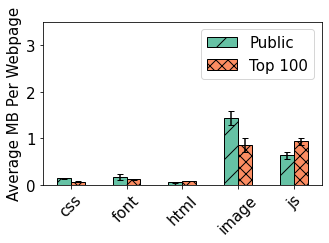

In [161]:

type_bytes = pd.DataFrame(to_plot_b, columns=["Public", "Top 100"], index=["css", "font","html", "image", "js"])
ax = type_bytes.plot(kind="bar", yerr=[public_errs, top_errs], color=sns.color_palette("Set2"), capsize=3, edgecolor="black", ylabel="Average MB Per Webpage",rot=45, ylim=(0,3.5), figsize=(5,3))
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(type_bytes))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()
plt.savefig("graphs/type_bytes.png", bbox_inches = 'tight')
plt.savefig("graphs/type_bytes.eps", bbox_inches = 'tight')

In [162]:
type_bytes

,Public,Top 100
css,0.141371,0.072275
font,0.165520,0.118906
html,0.054589,0.082050
image,1.440816,0.853938
js,0.637640,0.936460


In [163]:
# formatAvgSizes_public=[0]*11
# formatAvgSizes_top=[0]*11

# for country in countries:
#   formatAvgSizes_public[0]=formatAvgSizes_public[0]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("image",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[1]=formatAvgSizes_public[1]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("css",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[2]=formatAvgSizes_public[2]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("js|javascript",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[3]=formatAvgSizes_public[3]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("html",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[4]=formatAvgSizes_public[4]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("pdf",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[5]=formatAvgSizes_public[5]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("xml",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[6]=formatAvgSizes_public[6]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("font",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[7]=formatAvgSizes_public[7]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("audio",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[8]=formatAvgSizes_public[8]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("video",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[9]=formatAvgSizes_public[9]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("json",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[10]=formatAvgSizes_public[10]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()



# for country in countries:
#   formatAvgSizes_top[0]=formatAvgSizes_top[0]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("image",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[1]=formatAvgSizes_top[1]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("css",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[2]=formatAvgSizes_top[2]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("js|javascript",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[3]=formatAvgSizes_top[3]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("html",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[4]=formatAvgSizes_top[4]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("pdf",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[5]=formatAvgSizes_top[5]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("xml",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[6]=formatAvgSizes_top[6]+ (dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("font",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[7]=formatAvgSizes_top[7]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("audio",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[8]=formatAvgSizes_top[8]+ (dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("video",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[9]=formatAvgSizes_top[9]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("json",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[10]=formatAvgSizes_top[10]+ (dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()

 

# # formatAvgSizes_public = [x/len(countries) for x in formatAvgSizes_public]
# # formatAvgSizes_top = [x/len(countries) for x in formatAvgSizes_top]

# formatAvgSizes_public = np.round_(formatAvgSizes_public, decimals = 3)
# formatAvgSizes_top = np.round_(formatAvgSizes_top, decimals = 3)

# print(formatAvgSizes_public) 
# print(formatAvgSizes_top)

In [164]:
# content_labels=['Image','CSS','Javascript','HTML','PDF','XML','Font','Audio','Video','Json','Octet-stream/Binary']

# fig=go.Figure(data=[
#     go.Bar(name="Public",x=content_labels, y=formatAvgSizes_public,text=formatAvgSizes_public),
#     go.Bar(name="Top 100",x=content_labels, y=formatAvgSizes_top,text=formatAvgSizes_top)])
# fig.update_layout( title="Average Content Sizes", 
#                   title_x=0.5,
#                    width=600,
#                   height=600)
                  
# fig.update_xaxes(title_text="Content Type")
# fig.update_yaxes(title_text="MBs")
# fig.update_yaxes(automargin=True)


# fig.show()

In [165]:
  # formatAvgSizes_public[0]=formatAvgSizes_public[0]+
# (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("image",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
# dfs
  # formatAvgSizes_public[0]=formatAvgSizes_public[0]+
# (dfs['pakistan']['details'].loc[dfs['pakistan']['details']['contentType'].str.contains("image",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()


### **Content Type**

In [166]:
# Public
for country in countries:
  print(dfs[country]['details']['contentType'].value_counts())
   
# top
for country in countries:
  print(dfs_top[country]['details']['contentType'].value_counts())

application/javascript         1476
image/png                       722
text/css                        678
image/jpeg                      596
image/gif                       458
text/javascript                 441
text/plain                      433
image/svg+xml                   337
text/html                       322
application/x-javascript        228
application/json                207
font/woff2                      161
application/font-woff2           76
image/x-icon                     49
image/webp                       36
application/octet-stream         28
application/font-woff            18
video/mp4                        16
font/woff                        15
binary/octet-stream              11
application/binary                9
image                             8
application/json+protobuf         8
application/font-sfnt             7
application/x-font-woff           7
application/x-mpegURL             6
image/vnd.microsoft.icon          5
font/x-woff                 

very Rare 'vnd.oasis.opendocument.formula-template '

Content Types


1.   image
2.   javascript
3.   css
4.   html
5.   pdf
6.   xml
7.   font
8.   audio
9.   video
10.   json
11.   octet-stream/binary    
 




In [167]:
list_content_public=[0]*11
list_content_top=[0]*11

# public

for country in countries:
  list_content_public[0]+=(dfs[country]['details']['contentType'].str.contains("image",na=False)).sum()
  list_content_public[1]+=(dfs[country]['details']['contentType'].str.contains("javascript",na=False)).sum()
  list_content_public[1]+=(dfs[country]['details']['contentType']=='js').sum()
  list_content_public[2]+=(dfs[country]['details']['contentType'].str.contains("css",na=False)).sum()
  list_content_public[3]+=(dfs[country]['details']['contentType'].str.contains("html",na=False)).sum()
  list_content_public[4]+=(dfs[country]['details']['contentType'].str.contains("pdf",na=False)).sum()
  list_content_public[5]+=(dfs[country]['details']['contentType'].str.contains("xml",na=False)).sum()
  list_content_public[6]+=(dfs[country]['details']['contentType'].str.contains("font",na=False)).sum()
  list_content_public[7]+=(dfs[country]['details']['contentType'].str.contains("audio",na=False)).sum()
  list_content_public[8]+=(dfs[country]['details']['contentType'].str.contains("video",na=False)).sum()
  list_content_public[9]+=(dfs[country]['details']['contentType'].str.contains("json",na=False)).sum()
  list_content_public[10]+=(dfs[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)).sum()

# top 100
for country in countries:
  list_content_top[0]+=(dfs_top[country]['details']['contentType'].str.contains("image",na=False)).sum()
  list_content_top[1]+=(dfs_top[country]['details']['contentType'].str.contains("javascript",na=False)).sum()
  list_content_top[1]+=(dfs_top[country]['details']['contentType']=='js').sum()
  list_content_top[2]+=(dfs_top[country]['details']['contentType'].str.contains("css",na=False)).sum()
  list_content_top[3]+=(dfs_top[country]['details']['contentType'].str.contains("html",na=False)).sum()
  list_content_top[4]+=(dfs_top[country]['details']['contentType'].str.contains("pdf",na=False)).sum()
  list_content_top[5]+=(dfs_top[country]['details']['contentType'].str.contains("xml",na=False)).sum()
  list_content_top[6]+=(dfs_top[country]['details']['contentType'].str.contains("font",na=False)).sum()
  list_content_top[7]+=(dfs_top[country]['details']['contentType'].str.contains("audio",na=False)).sum()
  list_content_top[8]+=(dfs_top[country]['details']['contentType'].str.contains("video",na=False)).sum()
  list_content_top[9]+=(dfs_top[country]['details']['contentType'].str.contains("json",na=False)).sum()
  list_content_top[10]+=(dfs_top[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)).sum()

print(list_content_public)
print(list_content_top)



[31872, 18417, 8657, 3682, 41, 3750, 3071, 32, 161, 1833, 339]
[49834, 39528, 6319, 14273, 0, 4961, 2634, 38, 244, 10443, 1196]


In [168]:

content_labels=['Image','Javascript','CSS','HTML','PDF','XML','Font','Audio','Video','Json','Octet-stream/Binary']
# content_labels.sort()
fig=go.Figure(data=[
    go.Bar(name="Public",x=content_labels, y=list_content_public,text=list_content_public),
    go.Bar(name="Top 100",x=content_labels, y=list_content_top,text=list_content_top)])
# title="Number of Requests per Content Type", 
#                   title_x=0.5,
fig.update_layout( title="Number of Requests per Content Type", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Content Types")
fig.update_yaxes(title_text="No. of Requests")
fig.update_yaxes(automargin=True)
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Image','Javascript','CSS','HTML','Json','XML','Font','Octet-stream/Binary','Video']})


fig.show()

In [169]:
listavg_content_public=[0]*11
listavg_content_top=[0]*11

# public

for country in countries:
  listavg_content_public[0]+=(dfs[country]['details']['contentType'].str.contains("image",na=False)).sum()
  listavg_content_public[1]+=(dfs[country]['details']['contentType'].str.contains("javascript",na=False)).sum()
  listavg_content_public[1]+=(dfs[country]['details']['contentType']=='js').sum()
  listavg_content_public[2]+=(dfs[country]['details']['contentType'].str.contains("css",na=False)).sum()
  listavg_content_public[3]+=(dfs[country]['details']['contentType'].str.contains("html",na=False)).sum()
  listavg_content_public[4]+=(dfs[country]['details']['contentType'].str.contains("pdf",na=False)).sum()
  listavg_content_public[5]+=(dfs[country]['details']['contentType'].str.contains("xml",na=False)).sum()
  listavg_content_public[6]+=(dfs[country]['details']['contentType'].str.contains("font",na=False)).sum()
  listavg_content_public[7]+=(dfs[country]['details']['contentType'].str.contains("audio",na=False)).sum()
  listavg_content_public[8]+=(dfs[country]['details']['contentType'].str.contains("video",na=False)).sum()
  listavg_content_public[9]+=(dfs[country]['details']['contentType'].str.contains("json",na=False)).sum()
  listavg_content_public[10]+=(dfs[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)).sum()

# top 100
for country in countries:
  listavg_content_top[0]+=(dfs_top[country]['details']['contentType'].str.contains("image",na=False)).sum()
  listavg_content_top[1]+=(dfs_top[country]['details']['contentType'].str.contains("javascript",na=False)).sum()
  listavg_content_top[1]+=(dfs_top[country]['details']['contentType']=='js').sum()
  listavg_content_top[2]+=(dfs_top[country]['details']['contentType'].str.contains("css",na=False)).sum()
  listavg_content_top[3]+=(dfs_top[country]['details']['contentType'].str.contains("html",na=False)).sum()
  listavg_content_top[4]+=(dfs_top[country]['details']['contentType'].str.contains("pdf",na=False)).sum()
  listavg_content_top[5]+=(dfs_top[country]['details']['contentType'].str.contains("xml",na=False)).sum()
  listavg_content_top[6]+=(dfs_top[country]['details']['contentType'].str.contains("font",na=False)).sum()
  listavg_content_top[7]+=(dfs_top[country]['details']['contentType'].str.contains("audio",na=False)).sum()
  listavg_content_top[8]+=(dfs_top[country]['details']['contentType'].str.contains("video",na=False)).sum()
  listavg_content_top[9]+=(dfs_top[country]['details']['contentType'].str.contains("json",na=False)).sum()
  listavg_content_top[10]+=(dfs_top[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)).sum()


count1=0
count2=0
for country in countries:
  count1+=dfs[country]['summary']['final_url'].count()
  count2+=dfs_top[country]['summary']['final_url'].count()



# listavg_content_public=[x/len(countries) for x in listavg_content_public]
# listavg_content_top=[x/len(countries) for x in listavg_content_top]

listavg_content_public = [x/count1 for x in listavg_content_public]
listavg_content_top = [x/count2 for x in listavg_content_top]


listavg_content_public=[np.round(x,2) for x in listavg_content_public]
listavg_content_top=[np.round(x,2) for x in listavg_content_top]

print(listavg_content_public)
print(listavg_content_top)



[30.01, 17.34, 8.15, 3.47, 0.04, 3.53, 2.89, 0.03, 0.15, 1.73, 0.32]
[55.37, 43.92, 7.02, 15.86, 0.0, 5.51, 2.93, 0.04, 0.27, 11.6, 1.33]


In [170]:

content_labels=['Image','Javascript','CSS','HTML','PDF','XML','Font','Audio','Video','Json','Octet-stream/Binary']
# content_labels.sort()
fig=go.Figure(data=[
    go.Bar(name="Public",x=content_labels, y=listavg_content_public,text=listavg_content_public),
    go.Bar(name="Top 100",x=content_labels, y=listavg_content_top,text=listavg_content_top)])

fig.update_layout(title="Average No. of Requests per Content Type", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Content Types")
fig.update_yaxes(title_text="Average No. of Requests")
fig.update_yaxes(automargin=True)
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Image','Javascript','HTML','CSS','Json','XML','Font','Octet-stream/Binary','Video']})


fig.show()

29.556497175141242

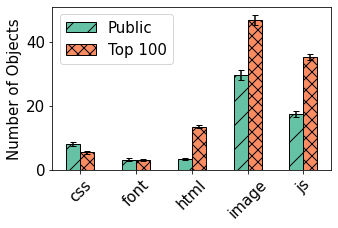

In [171]:
img_mean = df_summ_public["requests.image"].mean()
img_std = df_summ_public["requests.image"].std()
img_err = 1.96 * img_std/np.sqrt(len(df_summ_public["requests.image"]))
img_err

js_mean = df_summ_public["requests.js"].mean()
js_std = df_summ_public["requests.js"].std()
js_err = 1.96 * js_std/np.sqrt(len(df_summ_public["requests.js"]))
js_err

html_mean = df_summ_public["requests.html"].mean()
html_std = df_summ_public["requests.html"].std()
html_err = 1.96 * html_std/np.sqrt(len(df_summ_public["requests.html"]))
html_err


font_mean = df_summ_public["requests.font"].mean()
font_std = df_summ_public["requests.font"].std()
font_err = 1.96 * font_std/np.sqrt(len(df_summ_public["requests.font"]))

css_mean = df_summ_public["requests.css"].mean()
css_std = df_summ_public["requests.css"].std()
css_err = 1.96 * css_std/np.sqrt(len(df_summ_public["requests.css"]))

public_errs = [css_err, font_err, html_err, img_err, js_err]

img_mean_t = df_summ_top["requests.image"].mean()
img_std_t = df_summ_top["requests.image"].std()
img_err_t = 1.96 * img_std_t/np.sqrt(len(df_summ_top["requests.image"]))
img_err_t

js_mean_t = df_summ_top["requests.js"].mean()
js_std_t = df_summ_top["requests.js"].std()
js_err_t = 1.96 * js_std_t/np.sqrt(len(df_summ_top["requests.js"]))
js_err_t

html_mean_t = df_summ_top["requests.html"].mean()
html_std_t = df_summ_top["requests.html"].std()
html_err_t = 1.96 * html_std_t/np.sqrt(len(df_summ_top["requests.html"]))
html_err

font_mean_t = df_summ_top["requests.font"].mean()
font_std_t = df_summ_top["requests.font"].std()
font_err_t = 1.96 * font_std_t/np.sqrt(len(df_summ_top["bytes.font"]))

css_mean_t = df_summ_top["requests.css"].mean()
css_std_t = df_summ_top["requests.css"].std()
css_err_t = 1.96 * css_std_t/np.sqrt(len(df_summ_top["requests.css"]))

top_errs = [css_err, font_err, html_err, img_err, js_err]
to_plot = [[css_mean, css_mean_t],[font_mean, font_mean_t],[html_mean, html_mean_t],[img_mean, img_mean_t],[js_mean, js_mean_t]]

type_bytes = pd.DataFrame(to_plot, columns=["Public", "Top 100"], index=["css", "font", "html", "image", "js"])
ax = type_bytes.plot(kind="bar", yerr=[public_errs, top_errs], color=sns.color_palette("Set2"), capsize=3, edgecolor="black", ylabel="Number of Objects",rot=45, figsize=(5,3))
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(type_bytes))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()
plt.savefig("graphs/type_reqs.png", bbox_inches = 'tight')
plt.savefig("graphs/type_reqs.eps", bbox_inches = 'tight')
img_mean

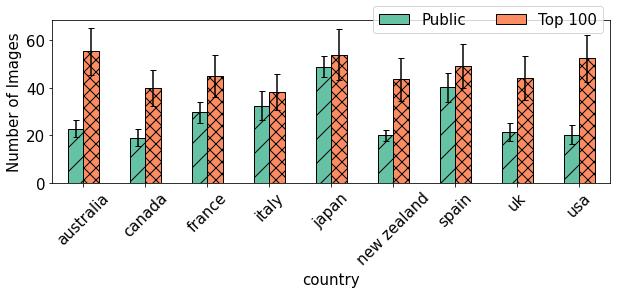

In [172]:
country_image_reqs = []
public_errs = []
top_errs = []
for country in countries:
  pub_std = dfs[country]["summary"]["requests.image"].std()
  pub_err = 1.96 * pub_std/np.sqrt(len(dfs[country]["summary"]["requests.image"]))
  public_errs.append(pub_err)

  top_std = dfs_top[country]["summary"]["requests.image"].std()
  top_err = 1.96 * top_std/np.sqrt(len(dfs_top[country]["summary"]["requests.image"]))
  top_errs.append(top_err)

  country_image_reqs.append([country, dfs[country]["summary"]["requests.image"].mean(), dfs_top[country]["summary"]["requests.image"].mean()])
country_image_reqs_df =pd.DataFrame(country_image_reqs, columns=["country", "Public", "Top 100"]).set_index("country")

ax = country_image_reqs_df.plot(kind="bar", yerr=[public_errs, top_errs], color=sns.color_palette("Set2"), capsize=3, edgecolor="black", ylabel="Number of Images",rot=45, figsize=(10,3))
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(country_image_reqs_df))]
ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=2)
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
  
plt.savefig("graphs/total_image_reqs.png", bbox_inches = 'tight')
plt.savefig("graphs/total_image_reqs.eps", bbox_inches = 'tight')

In [173]:
# summary5 =pd.read_csv(public +"bangladesh_summary.csv")
# df=pd.DataFrame()
# df={'summary':summary5}
# df['summary']['requests'].sum()

###**Requests per Country**

Public & Top 100 Separate

In [174]:
requests_public=[0]*len(countries)
requests_top=[0]*len(countries)

i=0
for country in countries:
  requests_public[i]=dfs[country]['summary']['requests'].sum()
  count=dfs[country]['summary']['final_url'].count()
  requests_public[i]=round(requests_public[i]/count)
  i=i+1

j=0
for country in countries:
  requests_top[j]=dfs_top[country]['summary']['requests'].sum()
  count=dfs_top[country]['summary']['final_url'].count()
  requests_top[j]=round(requests_top[j]/count)
  j=j+1

print(requests_public)
print(requests_top)

[69, 65, 63, 80, 82, 53, 77, 54, 69]
[163, 129, 136, 103, 142, 125, 128, 131, 166]


In [175]:

fig=go.Figure(data=[
    go.Bar(name="Public",x=countries, y=requests_public,text=requests_public),
    go.Bar(name="Top 100",x=countries, y=requests_top,text=requests_top)])
#  title="Average Number of Requests per url", 
#                   title_x=0.5,

fig.update_layout(width=600,
                  height=600)
                  
# fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="Average number of requests")
fig.update_yaxes(automargin=True)


fig.show()

29.556497175141242

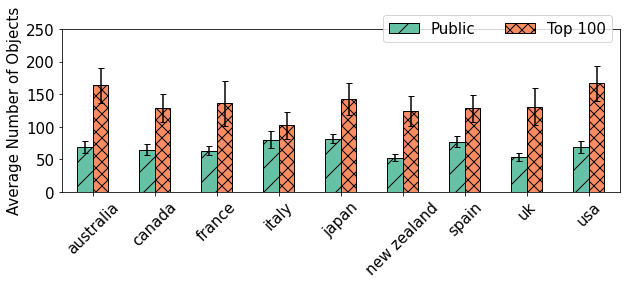

In [176]:
avg_reqs = []
errors = []
avg_reqs_t = []
errors_t = []
for country in countries:
    temp = dfs[country]["summary"]["requests"]
    temp2 = dfs_top[country]["summary"]["requests"]
    mean = temp.mean()
    sigma = temp.std()
    avg_reqs.append(mean)
    
    mean2 = temp2.mean()
    sigma2 = temp2.std()
    avg_reqs_t.append(mean2)
    
    
    errors.append(1.96*sigma/np.sqrt(len(temp)))
    errors_t.append(1.96*sigma2/np.sqrt(len(temp2)))

reqs_df = pd.DataFrame(zip(avg_reqs,avg_reqs_t), index=countries, columns=["Public","Top 100"])
reqs_df

palette = sns.color_palette("Set2")
ax = reqs_df.plot(kind="bar",  color=palette, yerr=[errors,errors_t], rot=45, capsize=3, figsize=(10,3), edgecolor="black", ylim=(0,250))

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(reqs_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_ylabel("Average Number of Objects")
ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=2)
plt.savefig("graphs/reqs_country.png", bbox_inches = 'tight')
plt.savefig("graphs/reqs_country.eps", bbox_inches = 'tight')
img_mean

Public & Top aggregated

In [177]:
aggregated_requests=[0]*len(countries)
k=0
for requests_p,requests_t in zip(requests_public,requests_top):
  aggregated_requests[k]= requests_p+requests_t 
  k=k+1


aggregated_requests

[232, 194, 199, 183, 224, 178, 205, 185, 235]

In [178]:

fig=go.Figure(data=[
    go.Bar(x=countries, y=aggregated_requests,text=aggregated_requests)])
fig.update_layout( title="Average Number of Requests per Url", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="Average No. of Requests")
fig.update_yaxes(automargin=True)


fig.show()

###**Total Image Bytes**

Image Sizes per country (public & Top 100)

In [179]:
imageTotalbytes_public=[0]*len(countries)
imageTotalbytes_top=[0]*len(countries)

i=0
for country in countries:
  imageTotalbytes_public[i]=round(((dfs[country]['summary']['bytes.image'].sum())/(1024*1024)),2)
  i=i+1

i=0
for country in countries:
  imageTotalbytes_top[i]=round(((dfs_top[country]['summary']['bytes.image'].sum())/(1024*1024)),2)
  i=i+1

print(imageTotalbytes_public)
print(imageTotalbytes_top)

[157.76, 147.99, 123.36, 197.52, 327.32, 129.14, 249.65, 119.45, 77.97]
[91.29, 57.05, 84.74, 92.37, 103.03, 70.54, 140.91, 66.76, 61.85]


In [180]:

fig=go.Figure(data=[
    go.Bar(name="Public",x=countries, y=imageTotalbytes_public,text=imageTotalbytes_public),
    go.Bar(name="Top 100",x=countries, y=imageTotalbytes_top,text=imageTotalbytes_top)])
fig.update_layout( title="Total Image Bytes", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="MBs")
fig.update_yaxes(automargin=True)


fig.show()

###**Aggregated**

In [181]:
public_imageBytes=round(sum(imageTotalbytes_public),2)
top_imageBytes=round(sum(imageTotalbytes_top),2)
print(public_imageBytes)
print(top_imageBytes)

1530.16
768.54


In [182]:

array_pImages=[]
array_tImages=[]
array_pImages.append(public_imageBytes)
array_tImages.append(top_imageBytes)

fig=go.Figure(data=[
    go.Bar(name="Public",x=['Public'], y=array_pImages,text=array_pImages),
    go.Bar(name="Top 100",x=['Top 100'], y=array_tImages,text=array_tImages)])
fig.update_layout( title="Total Image Bytes", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
# fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="MBs")
fig.update_yaxes(automargin=True)


fig.show()

In [183]:

# imagebytes_public=[0]*9
# imagebytes_top=[0]*9

# i=0
# for country in countries:
#   imagebytes_public[i]=(dfs[country]['details']['contentType'].str.contains('image/png|image/gif|image/jpeg|image/jpg|image/pjpeg|image/avif|svg+xml|x-icon|image/vnd.microsoft.icon|image/webp|image/bmp',na=False)).sum()
#   i=i+1


# i=0
# for country in countries:
#   imagebytes_top[i]=(dfs_top[country]['details']['contentType'].str.contains('image/png|image/gif|image/jpeg|image/jpg|image/pjpeg|image/avif|svg+xml|x-icon|image/vnd.microsoft.icon|image/webp|image/bmp',na=False)).sum()
#   i=i+1

# print(imagebytes_public)
# print(imagebytes_top)

In [184]:
dfs[country]['summary']['bytes.image'].dtypes

dtype('int64')

In [185]:
imagebytes_public=[0]*len(countries)
imagebytes_top=[0]*len(countries)

i=0
for country in countries:
  imagebytes_public[i]=round(((dfs[country]['summary']['bytes.image'].mean())/(1024*1024)),2)
  i=i+1

i=0
for country in countries:
  imagebytes_top[i]=round(((dfs_top[country]['summary']['bytes.image'].mean())/(1024*1024)),2)
  i=i+1

print(imagebytes_public)
print(imagebytes_top)

[1.66, 1.18, 1.23, 2.1, 1.95, 0.8, 1.78, 1.28, 0.92]
[0.91, 0.57, 0.85, 0.92, 1.03, 0.71, 1.41, 0.67, 0.62]


In [186]:

fig=go.Figure(data=[
    go.Bar(name="Public",x=countries, y=imagebytes_public,text=imagebytes_public),
    go.Bar(name="Top 100",x=countries, y=imagebytes_top,text=imagebytes_top)])
fig.update_layout( title="Average Image Sizes (M Bytes) per Url", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="Average Image mega bytes")
fig.update_yaxes(automargin=True)


fig.show()

0.7020354584800468

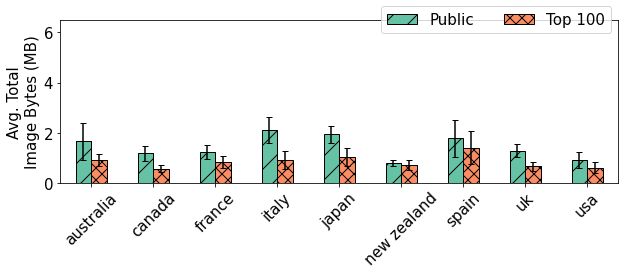

In [187]:
avg_reqs = []
errors = []
avg_reqs_t = []
errors_t = []
for country in countries:
    temp = dfs[country]["summary"]["bytes.image"]/(1024*1024)
    temp2 = dfs_top[country]["summary"]["bytes.image"]/(1024*1024)
    mean = temp.mean()
    sigma = temp.std()
    avg_reqs.append(mean)
    
    mean2 = temp2.mean()
    sigma2 = temp2.std()
    avg_reqs_t.append(mean2)
    
    
    errors.append(1.96*sigma/np.sqrt(len(temp)))
    errors_t.append(1.96*sigma2/np.sqrt(len(temp2)))

reqs_df = pd.DataFrame(zip(avg_reqs,avg_reqs_t), index=countries, columns=["Public","Top 100"])
reqs_df

palette = sns.color_palette("Set2")
ax = reqs_df.plot(kind="bar",  color=palette, yerr=[errors,errors_t], rot=45, capsize=3, figsize=(10,3), edgecolor="black", ylim=(0,6.5))

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(reqs_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_ylabel("Avg. Total\nImage Bytes (MB)")
ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=2)
plt.savefig("graphs/bytes_total_image_country.png", bbox_inches = 'tight')
plt.savefig("graphs/bytes_total_image_country.eps", bbox_inches = 'tight')

((reqs_df["Public"] - reqs_df["Top 100"])/reqs_df["Top 100"]).mean()

In [188]:
np.mean(reqs_df)

Public     1.434409
Top 100    0.853938
dtype: float64

In [189]:
np.mean(imagebytes_top)

0.8544444444444445

In [190]:
max_avg=[*map(max, zip(imagebytes_public, imagebytes_top))]
min_avg=[*map(min, zip(imagebytes_public, imagebytes_top))]

data = {'Country': countries,'Min Image Sizes':min_avg,'Max Image Sizes':max_avg}
df = pd.DataFrame(data)
print("Average Image Sizes per Url")
df


Average Image Sizes per Url


,Country,Min Image Sizes,Max Image Sizes
0,australia,0.91,1.66
1,canada,0.57,1.18
2,france,0.85,1.23
3,italy,0.92,2.10
4,japan,1.03,1.95
5,new zealand,0.71,0.80
6,spain,1.41,1.78
7,uk,0.67,1.28
8,usa,0.62,0.92


###**Aggregated**

In [191]:
# aggregated_Pimages=round(sum(imagebytes_public),2)
# aggregated_tImages=round(sum(imagebytes_top),2)
# print(aggregated_Pimages)
# print(aggregated_tImages)

In [192]:
# array_aggP=[]
# array_aggT=[]
# array_aggP.append(aggregated_Pimages)
# array_aggT.append(aggregated_tImages)

# fig=go.Figure(data=[
#     go.Bar(name="Public",x=['Public'], y=array_aggP,text=array_aggP),
#     go.Bar(name="Top 100", x=['Top'], y=array_aggT,text=array_aggT)])
# fig.update_layout( title="Average Image Sizes per Url", 
#                   title_x=0.5,
#                    width=600,
#                   height=600)
                  
# # fig.update_xaxes(title_text="Countries")
# fig.update_yaxes(title_text="MBs")
# fig.update_yaxes(automargin=True)


# fig.show()

Aggregated Image Sizes per Country

In [193]:
aggregated_imageSizes=[0]*len(countries)

k=0
for image_p,image_t in zip(imagebytes_public,imagebytes_top):
  aggregated_imageSizes[k]= round(image_p+image_t,2) 
  k=k+1

aggregated_imageSizes

[2.57, 1.75, 2.08, 3.02, 2.98, 1.51, 3.19, 1.95, 1.54]

In [194]:

fig=go.Figure(data=[
    go.Bar(x=countries, y=aggregated_imageSizes,text=aggregated_imageSizes)])
fig.update_layout( title="Average Image Sizes (M Bytes) per Url ", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="Average Image Sizes")
fig.update_yaxes(automargin=True)


fig.show()

###**Image Formats Size Analysis**

Public & Top 100

In [195]:
image_format_public=[0]*len(countries)
image_format_top=[0]*len(countries)

for country in countries:
  image_format_public[0]=image_format_public[0]+dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/png"].bytesIn.sum()/(1024*1024)
  image_format_public[1]=image_format_public[1]+dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/gif"].bytesIn.sum()/(1024*1024)
  image_format_public[2]=image_format_public[2]+dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("image/jpeg|image/jpg|image/pjpeg",na=False)].bytesIn.sum()/(1024*1024)
  image_format_public[3]=image_format_public[3]+dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/avif"].bytesIn.sum()/(1024*1024)
  image_format_public[4]=image_format_public[4]+dfs[country]['details'].loc[dfs[country]['details']['contentType']=="svg+xml"].bytesIn.sum()/(1024*1024)
  image_format_public[5]=image_format_public[5]+dfs[country]['details'].loc[dfs[country]['details']['contentType']=="x-icon"].bytesIn.sum()/(1024*1024)
  image_format_public[6]=image_format_public[6]+ dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/vnd.microsoft.icon"].bytesIn.sum()/(1024*1024)
  image_format_public[7]=image_format_public[7]+dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/webp"].bytesIn.sum()/(1024*1024)
  image_format_public[8]=image_format_public[8]+ dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/bmp"].bytesIn.sum()/(1024*1024)

for country in countries:
  image_format_top[0]=image_format_top[0]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/png"].bytesIn.sum()/(1024*1024)
  image_format_top[1]=image_format_top[1]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/gif"].bytesIn.sum()/(1024*1024)
  image_format_top[2]=image_format_top[2]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("image/jpeg|image/jpg|image/pjpeg",na=False)].bytesIn.sum()/(1024*1024)
  image_format_top[3]=image_format_top[3]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/avif"].bytesIn.sum()/(1024*1024)
  image_format_top[4]=image_format_top[4]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="svg+xml"].bytesIn.sum()/(1024*1024)
  image_format_top[5]=image_format_top[5]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="x-icon"].bytesIn.sum()/(1024*1024)
  image_format_top[6]=image_format_top[6]+ dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/vnd.microsoft.icon"].bytesIn.sum()/(1024*1024)
  image_format_top[7]=image_format_top[7]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/webp"].bytesIn.sum()/(1024*1024)
  image_format_top[8]=image_format_top[8]+ dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/bmp"].bytesIn.sum()/(1024*1024)


image_format_public = np.round_(image_format_public, decimals = 2)
image_format_top = np.round_(image_format_top, decimals = 2)

print(image_format_public) 
print(image_format_top)

[512.61  18.1  929.82   1.2    0.     0.     2.98  19.87   0.  ]
[278.54  55.69 461.6   12.85   0.     0.     1.03 130.81   0.  ]


In [196]:
image_labels=['png','gif','jpg','avif','svg+xml','x-icon','vnd.microsoft.icon','webp','bmp']
# image_labels.sort()
fig=go.Figure(data=[
    go.Bar(name="Public",x=image_labels, y=image_format_public,text=image_format_public),
    go.Bar(name="Top 100",x=image_labels, y=image_format_top,text=image_format_top)])
fig.update_layout( title="Image Format Sizes (M Bytes)", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Image Formats")
fig.update_yaxes(title_text="Sizes")
fig.update_yaxes(automargin=True)
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['jpg','png','webp','gif']})


fig.show()

In [197]:
image_formatAvg_public=[0]*len(countries)
image_formatAvg_top=[0]*len(countries)

for country in countries:
  image_formatAvg_public[0]=image_formatAvg_public[0]+(dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/png"].bytesIn.sum()/(1024*1024))
  image_formatAvg_public[1]=image_formatAvg_public[1]+(dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/gif"].bytesIn.sum()/(1024*1024))
  image_formatAvg_public[2]=image_formatAvg_public[2]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("image/jpeg|image/jpg|image/pjpeg",na=False)].bytesIn.sum()/(1024*1024))
  image_formatAvg_public[3]=image_formatAvg_public[3]+(dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/avif"].bytesIn.sum()/(1024*1024))
  image_formatAvg_public[4]=image_formatAvg_public[4]+(dfs[country]['details'].loc[dfs[country]['details']['contentType']=="svg+xml"].bytesIn.sum()/(1024*1024))
  image_formatAvg_public[5]=image_formatAvg_public[5]+(dfs[country]['details'].loc[dfs[country]['details']['contentType']=="x-icon"].bytesIn.sum()/(1024*1024))
  image_formatAvg_public[6]=image_formatAvg_public[6]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/vnd.microsoft.icon"].bytesIn.sum()/(1024*1024))
  image_formatAvg_public[7]=image_formatAvg_public[7]+(dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/webp"].bytesIn.sum()/(1024*1024))
  image_formatAvg_public[8]=image_formatAvg_public[8]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/bmp"].bytesIn.sum()/(1024*1024))
for country in countries:
  image_formatAvg_top[0]=image_formatAvg_top[0]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/png"].bytesIn.sum()/(1024*1024))
  image_formatAvg_top[1]=image_formatAvg_top[1]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/gif"].bytesIn.sum()/(1024*1024))
  image_formatAvg_top[2]=image_formatAvg_top[2]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("image/jpeg|image/jpg|image/pjpeg",na=False)].bytesIn.sum()/(1024*1024))
  image_formatAvg_top[3]=image_formatAvg_top[3]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/avif"].bytesIn.sum()/(1024*1024))
  image_formatAvg_top[4]=image_formatAvg_top[4]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="svg+xml"].bytesIn.sum()/(1024*1024))
  image_formatAvg_top[5]=image_formatAvg_top[5]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="x-icon"].bytesIn.sum()/(1024*1024))
  image_formatAvg_top[6]=image_formatAvg_top[6]+ (dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/vnd.microsoft.icon"].bytesIn.sum()/(1024*1024))
  image_formatAvg_top[7]=image_formatAvg_top[7]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/webp"].bytesIn.sum()/(1024*1024))
  image_formatAvg_top[8]=image_formatAvg_top[8]+ (dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/bmp"].bytesIn.sum()/(1024*1024))


count1=0
count2=0
for country in countries:
  count1+=dfs[country]['summary']['final_url'].count()
  count2+=dfs_top[country]['summary']['final_url'].count()


# image_formatAvg_public = [x/len(countries) for x in image_formatAvg_public]
# image_formatAvg_top = [x/len(countries) for x in image_formatAvg_top]

image_formatAvg_public=[x/count1 for x in image_formatAvg_public]
image_formatAvg_top = [x/count2 for x in image_formatAvg_top]

image_formatAvg_public = np.round_(image_formatAvg_public, decimals = 2)
image_formatAvg_top = np.round_(image_formatAvg_top, decimals = 2)

print(image_formatAvg_public) 
print(image_formatAvg_top)

[0.48 0.02 0.88 0.   0.   0.   0.   0.02 0.  ]
[0.31 0.06 0.51 0.01 0.   0.   0.   0.15 0.  ]


In [198]:
image_labels=['png','gif','jpg','avif','svg+xml','x-icon','vnd.microsoft.icon','webp','bmp']
# image_labels.sort()

fig=go.Figure(data=[
    go.Bar(name="Public",x=image_labels, y=image_formatAvg_public,text=image_formatAvg_public),
    go.Bar(name="Top 100",x=image_labels, y=image_formatAvg_top,text=image_formatAvg_top)])
fig.update_layout( title="Average Image Format Sizes", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Image Formats")
fig.update_yaxes(title_text="MBs")
fig.update_yaxes(automargin=True)
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['jpg','png','webp','gif']})


fig.show()

0.04947193284052532
0.0195707887748298


0.05642237799508231

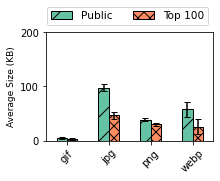

In [199]:
details_public = []
for country in countries:
  details_public.append(dfs[country]['details'][dfs[country]['details']["request_type"]=="Image"].copy())
df_det_public = pd.concat(details_public, axis=0)
print(df_det_public["bytesIn"].mean()/(1024*1024))
details_top = []
for country in countries:
  details_top.append(dfs_top[country]['details'][dfs_top[country]['details']["request_type"]=="Image"].copy())
df_det_top = pd.concat(details_top, axis=0)
print(df_det_top["bytesIn"].mean()/(1024*1024))
png = df_det_public[df_det_public["contentType"]=="image/png"]["bytesIn"]/(1024)
png_mean = png.mean()
png_std = png.std()
png_err = 1.96 * png_std/np.sqrt(len(png))

webp = df_det_public[df_det_public["contentType"]=="image/webp"]["bytesIn"]/(1024)
webp_mean = webp.mean()
webp_std = webp.std()
webp_err = 1.96 * webp_std/np.sqrt(len(webp))

gif = df_det_public[df_det_public["contentType"]=="image/gif"]["bytesIn"]/(1024)
gif_mean = gif.mean()
gif_std = gif.std()
gif_err = 1.96 * gif_std/np.sqrt(len(gif))

jpg = df_det_public[(df_det_public["contentType"]=="image/jpeg") | (df_det_public["contentType"]=="image/jpg") | (df_det_public["contentType"]=="image/pjpeg")]["bytesIn"]/(1024)
jpg_mean = jpg.mean()
jpg_std = jpg.std()
jpg_err = 1.96 * jpg_std/np.sqrt(len(jpg))

public_errs = [gif_err, jpg_err, png_err, webp_err]

png_t = df_det_top[df_det_top["contentType"]=="image/png"]["bytesIn"]/(1024)
png_mean_t = png_t.mean()
png_std_t = png_t.std()
png_err_t = 1.96 * png_std_t/np.sqrt(len(png_t))

webp_t = df_det_top[df_det_top["contentType"]=="image/webp"]["bytesIn"]/(1024)
webp_mean_t = webp_t.mean()
webp_std_t = webp_t.std()
webp_err_t = 1.96 * webp_std_t/np.sqrt(len(webp_t))

gif_t = df_det_top[df_det_top["contentType"]=="image/gif"]["bytesIn"]/(1024)
gif_mean_t = gif_t.mean()
gif_std_t = gif_t.std()
gif_err_t = 1.96 * gif_std_t/np.sqrt(len(gif_t))

jpg_t = df_det_top[(df_det_top["contentType"]=="image/jpeg") | (df_det_top["contentType"]=="image/jpg") | (df_det_top["contentType"]=="image/pjpeg")]["bytesIn"]/(1024)
jpg_mean_t = jpg_t.mean()
jpg_std_t = jpg_t.std()
jpg_err_t = 1.96 * jpg_std_t/np.sqrt(len(jpg_t))

top_errs = [gif_err, jpg_err, png_err, webp_err]

to_plot = [[gif_mean, gif_mean_t], [jpg_mean, jpg_mean_t], [png_mean, png_mean_t], [webp_mean, webp_mean_t]]

type_bytes = pd.DataFrame(to_plot, columns=["Public", "Top 100"], index=["gif", "jpg", "png", "webp"])
ax = type_bytes.plot(kind="bar", yerr=[public_errs, top_errs], color=sns.color_palette("Set2"), capsize=3, edgecolor="black", ylabel="Average Size (KB)",rot=45, ylim=(0,200), figsize=(3,2))
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(type_bytes))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
# ax.legend()
plt.yticks(fontsize=10)
ax.legend(loc="center right", ncol=2, bbox_to_anchor=(1, 1.15), prop=dict(size=10.5))
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
ax.set_ylabel(ylabel="Average Size (KB)", fontsize=9)

plt.savefig("graphs/format_bytes.png", bbox_inches = 'tight')
plt.savefig("graphs/format_bytes.eps", bbox_inches = 'tight')
(df_det_public[df_det_public["contentType"]=="image/png"]["bytesIn"]/(1024*1024)).mean()
(df_det_public[df_det_public["contentType"]=="image/webp"]["bytesIn"]/(1024*1024)).mean()

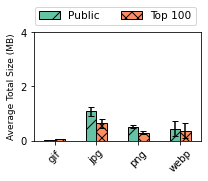

In [200]:

png_data = []
for country in countries:
  all_img = dfs[country]['details'][dfs[country]['details']["contentType"]=="image/png"]
  png_data.append(all_img.groupby("id").sum())
png_public = pd.concat(png_data, axis=0)
png_public["bytesIn"]

gif_data = []
for country in countries:
  all_img = dfs[country]['details'][dfs[country]['details']["contentType"]=="image/gif"]
  gif_data.append(all_img.groupby("id").sum())
gif_public = pd.concat(gif_data, axis=0)
gif_public["bytesIn"]

webp_data = []
for country in countries:
  all_img = dfs[country]['details'][dfs[country]['details']["contentType"]=="image/webp"]
  webp_data.append(all_img.groupby("id").sum())
webp_public = pd.concat(webp_data, axis=0)
webp_public["bytesIn"]

jpg_data = []
for country in countries:
  all_img = dfs[country]['details'][(dfs[country]['details']["contentType"]=="image/jpeg") | (dfs[country]['details']["contentType"]=="image/jpg") | (dfs[country]['details']["contentType"]=="image/pjpeg")]
  jpg_data.append(all_img.groupby("id").sum())
jpg_public = pd.concat(jpg_data, axis=0)
jpg_public["bytesIn"]

png = png_public["bytesIn"]/(1024*1024)
png_mean = png.mean()
png_std = png.std()
png_err = 1.96 * png_std/np.sqrt(len(png))

webp = webp_public["bytesIn"]/(1024*1024)
webp_mean = webp.mean()
webp_std = webp.std()
webp_err = 1.96 * webp_std/np.sqrt(len(webp))

gif = gif_public["bytesIn"]/(1024*1024)
gif_mean = gif.mean()
gif_std = gif.std()
gif_err = 1.96 * gif_std/np.sqrt(len(gif))

jpg = jpg_public["bytesIn"]/(1024*1024)
jpg_mean = jpg.mean()
jpg_std = jpg.std()
jpg_err = 1.96 * jpg_std/np.sqrt(len(jpg))

public_errs = [gif_err, jpg_err, png_err, webp_err]

png_data = []
for country in countries:
  all_img = dfs_top[country]['details'][dfs_top[country]['details']["contentType"]=="image/png"]
  png_data.append(all_img.groupby("id").sum())
png_public = pd.concat(png_data, axis=0)
png_public["bytesIn"]

gif_data = []
for country in countries:
  all_img = dfs_top[country]['details'][dfs_top[country]['details']["contentType"]=="image/gif"]
  gif_data.append(all_img.groupby("id").sum())
gif_public = pd.concat(gif_data, axis=0)
gif_public["bytesIn"]

webp_data = []
for country in countries:
  all_img = dfs_top[country]['details'][dfs_top[country]['details']["contentType"]=="image/webp"]
  webp_data.append(all_img.groupby("id").sum())
webp_public = pd.concat(webp_data, axis=0)
webp_public["bytesIn"]

jpg_data = []
for country in countries:
  all_img = dfs_top[country]['details'][(dfs_top[country]['details']["contentType"]=="image/jpeg") | (dfs_top[country]['details']["contentType"]=="image/jpg") | (dfs_top[country]['details']["contentType"]=="image/pjpeg")]
  jpg_data.append(all_img.groupby("id").sum())
jpg_public = pd.concat(jpg_data, axis=0)
jpg_public["bytesIn"]


png_t = png_public["bytesIn"]/(1024*1024)
png_mean_t = png_t.mean()
png_std_t = png_t.std()
png_err_t = 1.96 * png_std_t/np.sqrt(len(png_t))

webp_t = webp_public["bytesIn"]/(1024*1024)
webp_mean_t = webp_t.mean()
webp_std_t = webp_t.std()
webp_err_t = 1.96 * webp_std_t/np.sqrt(len(webp_t))

gif_t = gif_public["bytesIn"]/(1024*1024)
gif_mean_t = gif_t.mean()
gif_std_t = gif_t.std()
gif_err_t = 1.96 * gif_std_t/np.sqrt(len(gif_t))

jpg_t = jpg_public["bytesIn"]/(1024*1024)
jpg_mean_t = jpg_t.mean()
jpg_std_t = jpg_t.std()
jpg_err_t = 1.96 * jpg_std_t/np.sqrt(len(jpg_t))

top_errs = [gif_err, jpg_err, png_err, webp_err]

to_plot = [[gif_mean, gif_mean_t], [jpg_mean, jpg_mean_t], [png_mean, png_mean_t], [webp_mean, webp_mean_t]]

type_bytes = pd.DataFrame(to_plot, columns=["Public", "Top 100"], index=["gif", "jpg", "png", "webp"])
ax = type_bytes.plot(kind="bar", yerr=[public_errs, top_errs], color=sns.color_palette("Set2"), capsize=3, edgecolor="black", ylabel="Average Total Size (MB)",rot=45, ylim=(0,4), figsize=(3,2))
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(type_bytes))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend(loc="center right", ncol=2, bbox_to_anchor=(1, 1.15), prop=dict(size=10.5))
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
ax.set_ylabel(ylabel="Average Total Size (MB)", fontsize=9)
plt.savefig("graphs/format_bytes_total.png", bbox_inches = 'tight')
plt.savefig("graphs/format_bytes_total.eps", bbox_inches = 'tight')

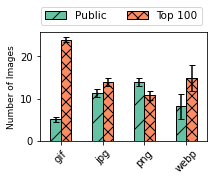

In [201]:

png_data = []
for country in countries:
  all_img = dfs[country]['details'][dfs[country]['details']["contentType"]=="image/png"]
  png_data.append(all_img.groupby("id").count())
png_public = pd.concat(png_data, axis=0)
png_public["bytesIn"]

gif_data = []
for country in countries:
  all_img = dfs[country]['details'][dfs[country]['details']["contentType"]=="image/gif"]
  gif_data.append(all_img.groupby("id").count())
gif_public = pd.concat(gif_data, axis=0)
gif_public["bytesIn"]

webp_data = []
for country in countries:
  all_img = dfs[country]['details'][dfs[country]['details']["contentType"]=="image/webp"]
  webp_data.append(all_img.groupby("id").count())
webp_public = pd.concat(webp_data, axis=0)
webp_public["bytesIn"]

jpg_data = []
for country in countries:
  all_img = dfs[country]['details'][(dfs[country]['details']["contentType"]=="image/jpeg") | (dfs[country]['details']["contentType"]=="image/jpg") | (dfs[country]['details']["contentType"]=="image/pjpeg")]
  jpg_data.append(all_img.groupby("id").count())
jpg_public = pd.concat(jpg_data, axis=0)
jpg_public["bytesIn"]

png = png_public["bytesIn"]
png_mean = png.mean()
png_std = png.std()
png_err = 1.96 * png_std/np.sqrt(len(png))

webp = webp_public["bytesIn"]
webp_mean = webp.mean()
webp_std = webp.std()
webp_err = 1.96 * webp_std/np.sqrt(len(webp))

gif = gif_public["bytesIn"]
gif_mean = gif.mean()
gif_std = gif.std()
gif_err = 1.96 * gif_std/np.sqrt(len(gif))

jpg = jpg_public["bytesIn"]
jpg_mean = jpg.mean()
jpg_std = jpg.std()
jpg_err = 1.96 * jpg_std/np.sqrt(len(jpg))

public_errs = [gif_err, jpg_err, png_err, webp_err]

png_data = []
for country in countries:
  all_img = dfs_top[country]['details'][dfs_top[country]['details']["contentType"]=="image/png"]
  png_data.append(all_img.groupby("id").count())
png_public = pd.concat(png_data, axis=0)
png_public["bytesIn"]

gif_data = []
for country in countries:
  all_img = dfs_top[country]['details'][dfs_top[country]['details']["contentType"]=="image/gif"]
  gif_data.append(all_img.groupby("id").count())
gif_public = pd.concat(gif_data, axis=0)
gif_public["bytesIn"]

webp_data = []
for country in countries:
  all_img = dfs_top[country]['details'][dfs_top[country]['details']["contentType"]=="image/webp"]
  webp_data.append(all_img.groupby("id").count())
webp_public = pd.concat(webp_data, axis=0)
webp_public["bytesIn"]

jpg_data = []
for country in countries:
  all_img = dfs_top[country]['details'][(dfs_top[country]['details']["contentType"]=="image/jpeg") | (dfs_top[country]['details']["contentType"]=="image/jpg") | (dfs_top[country]['details']["contentType"]=="image/pjpeg")]
  jpg_data.append(all_img.groupby("id").count())
jpg_public = pd.concat(jpg_data, axis=0)
jpg_public["bytesIn"]


png_t = png_public["bytesIn"]
png_mean_t = png_t.mean()
png_std_t = png_t.std()
png_err_t = 1.96 * png_std_t/np.sqrt(len(png_t))

webp_t = webp_public["bytesIn"]
webp_mean_t = webp_t.mean()
webp_std_t = webp_t.std()
webp_err_t = 1.96 * webp_std_t/np.sqrt(len(webp_t))

gif_t = gif_public["bytesIn"]
gif_mean_t = gif_t.mean()
gif_std_t = gif_t.std()
gif_err_t = 1.96 * gif_std_t/np.sqrt(len(gif_t))

jpg_t = jpg_public["bytesIn"]
jpg_mean_t = jpg_t.mean()
jpg_std_t = jpg_t.std()
jpg_err_t = 1.96 * jpg_std_t/np.sqrt(len(jpg_t))

top_errs = [gif_err, jpg_err, png_err, webp_err]

to_plot = [[gif_mean, gif_mean_t], [jpg_mean, jpg_mean_t], [png_mean, png_mean_t], [webp_mean, webp_mean_t]]

type_bytes = pd.DataFrame(to_plot, columns=["Public", "Top 100"], index=["gif", "jpg", "png", "webp"])
ax = type_bytes.plot(kind="bar", yerr=[public_errs, top_errs], color=sns.color_palette("Set2"), capsize=3, edgecolor="black", ylabel="Number of Images",rot=45, figsize=(3,2))
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(type_bytes))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend(loc="center right", ncol=2, bbox_to_anchor=(1, 1.15), prop=dict(size=10.5))
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
ax.set_ylabel(ylabel="Number of Images", fontsize=9)
plt.savefig("graphs/format_reqs_total.png", bbox_inches = 'tight')
plt.savefig("graphs/format_reqs_total.eps", bbox_inches = 'tight')

'JPG' format takes up the most space in Images specifically in Public Sites

Aggregated

In [202]:
# # aggregated_imageFormat_Sizes=[0]*9
# # # image_format_public
# # # image_format_top
# # k=0
# # for image_p,image_t in zip(,):
# #   aggregated_imageFormat_Sizes[k]= round(image_p+image_t,2) 
# #   k=k+1

# # aggregated_imageFormat_Sizes
# aggregated_imageSizes=[0]*9

# k=0
# for image_p,image_t in zip(imagebytes_public,imagebytes_top):
#   aggregated_imageSizes[k]= round(image_p+image_t,2) 
#   k=k+1

# aggregated_imageSizes

In [203]:

# # fig=go.Figure(data=[
# #     go.Bar(x=countries, y=aggregated_imageFormat_Sizes,text=aggregated_imageFormat_Sizes)])
# # fig.update_layout( title="Image Sizes per Country (M Bytes)", 
# #                   title_x=0.5,
# #                    width=600,
# #                   height=600)
                  
# # fig.update_xaxes(title_text="Countries")
# # fig.update_yaxes(title_text="Sizes")
# # fig.update_yaxes(automargin=True)


# # fig.show()


# fig=go.Figure(data=[
#     go.Bar(x=countries, y=aggregated_imageSizes,text=aggregated_imageSizes)])
# fig.update_layout( title="Image Sizes (M Bytes) per Country", 
#                   title_x=0.5,
#                    width=600,
#                   height=600)
                  
# fig.update_xaxes(title_text="Countries")
# fig.update_yaxes(title_text="Image Sizes")
# fig.update_yaxes(automargin=True)


# fig.show()

In [204]:
# First find No. of Image Requests per Country 

image_requests_perCountryPublic =[0]*len(countries)
image_requests_perCountryTop =[0]*len(countries)

i=0
for country in countries:
  image_requests_perCountryPublic[i]=dfs[country]['details']['contentType'].str.contains("image/png|image/gif|image/jpeg|image/jpg|image/pjpeg|image/avif|svg+xml|x-icon|image/vnd.microsoft.icon|image/webp|image/bmp",na=False).sum()
  image_requests_perCountryTop[i]=dfs_top[country]['details']['contentType'].str.contains("image/png|image/gif|image/jpeg|image/jpg|image/pjpeg|image/avif|svg+xml|x-icon|image/vnd.microsoft.icon|image/webp|image/bmp",na=False).sum()
  i=i+1

print(image_requests_perCountryPublic)
print(image_requests_perCountryTop)



[1871, 2056, 2663, 2693, 7667, 2619, 5409, 1708, 1473]
[5010, 4877, 3971, 4214, 5820, 6147, 4815, 3990, 6284]


In [205]:

fig=go.Figure(data=[
    go.Bar(name="Public",x=countries, y=image_requests_perCountryPublic,text=image_requests_perCountryPublic),
    go.Bar(name="Top 100",x=countries, y=image_requests_perCountryTop,text=image_requests_perCountryTop)])
fig.update_layout( title="Image Requests per Country (M Bytes)", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="No. of Requests")
fig.update_yaxes(automargin=True)


fig.show()

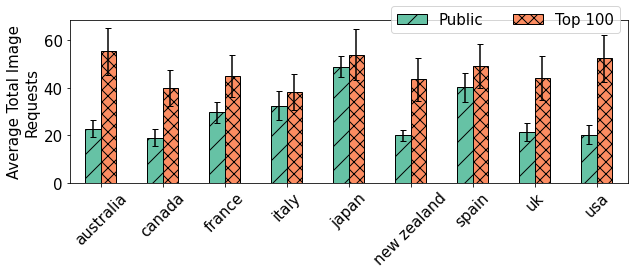

In [206]:
avg_reqs = []
errors = []
avg_reqs_t = []
errors_t = []
for country in countries:
    temp = dfs[country]["summary"]["requests.image"]
    temp2 = dfs_top[country]["summary"]["requests.image"]
    mean = temp.mean()
    sigma = temp.std()
    avg_reqs.append(mean)
    
    mean2 = temp2.mean()
    sigma2 = temp2.std()
    avg_reqs_t.append(mean2)
    
    
    errors.append(1.96*sigma/np.sqrt(len(temp)))
    errors_t.append(1.96*sigma2/np.sqrt(len(temp2)))

reqs_df = pd.DataFrame(zip(avg_reqs,avg_reqs_t), index=countries, columns=["Public","Top 100"])
reqs_df

palette = sns.color_palette("Set2")
ax = reqs_df.plot(kind="bar",  color=palette, yerr=[errors,errors_t], rot=45, capsize=3, figsize=(10,3), edgecolor="black")

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(reqs_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_ylabel("Average Total Image\nRequests")
ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=2)
plt.savefig("graphs/reqs_total_image_country.png", bbox_inches = 'tight')
plt.savefig("graphs/reqs_total_image_country.eps", bbox_inches = 'tight')

Ghana web pages contribute to the most Images Sizes; Its not clear whether Alot of images are being used or the size of Images contribute to this percentage (More analysis needs to be done)

To Check:

1.   Average number of images (An) used in each url (Total image Requests/Total urls of public & Top 100)
2.   Average sizes of images (Av) in each url (Total Image Size/Total urls of public & Top 100)
3.   Find Ratio Av/An --> This gives the average size of 1 image used in a url
4.  Compare results of countries


In [207]:
# First find No. of Image Requests per Country 

image_requests_perCountry =[0]*len(countries)

i=0
for country in countries:
  image_requests_perCountry[i]=dfs[country]['details']['contentType'].str.contains("image/png|image/gif|image/jpeg|image/jpg|image/pjpeg|image/avif|svg+xml|x-icon|image/vnd.microsoft.icon|image/webp|image/bmp",na=False).sum()+dfs_top[country]['details']['contentType'].str.contains("image/png|image/gif|image/jpeg|image/jpg|image/pjpeg|image/avif|svg+xml|x-icon|image/vnd.microsoft.icon|image/webp|image/bmp",na=False).sum()
  i=i+1

image_requests_perCountry


[6881, 6933, 6634, 6907, 13487, 8766, 10224, 5698, 7757]

In [208]:

fig=go.Figure(data=[
    go.Bar(x=countries, y=image_requests_perCountry,text=image_requests_perCountry)])
fig.update_layout( title="Image Requests per Country (M Bytes)", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="No. of Requests")
fig.update_yaxes(automargin=True)


fig.show()

In [209]:
print("Public Sites")
for country in countries:
  print(country+ ": "+str(dfs[country]['summary']['final_url'].count()))
print("\n Top 100")
for country in countries:
  print(country+ ": "+str(dfs_top[country]['summary']['final_url'].count()))


Public Sites
australia: 95
canada: 125
france: 100
italy: 94
japan: 168
new zealand: 162
spain: 140
uk: 93
usa: 85

 Top 100
australia: 100
canada: 100
france: 100
italy: 100
japan: 100
new zealand: 100
spain: 100
uk: 100
usa: 100


**Note: India and Ethiopia urls are alot less than Ghana in Public which can affect our analysis**

In [210]:
average_image_size=[0]*len(countries)

i=0
for country in countries:
  # av1=aggregated_imageSizes[i]/(dfs[country]['summary']['final_url'].count()+ dfs_top[country]['summary']['final_url'].count()) # avg image sizes
  av1=aggregated_imageSizes[i]
  av2=image_requests_perCountry[i]/(dfs[country]['summary']['final_url'].count()+ dfs_top[country]['summary']['final_url'].count()) # avg image requests
  average_image_size[i]=av1/av2 # gives average image size used
  i=i+1
average_image_size=[np.round(x,2) for x in average_image_size]
# average_image_size
average_image_size

[0.07, 0.06, 0.06, 0.08, 0.06, 0.05, 0.07, 0.07, 0.04]

In [211]:

fig=go.Figure(data=[
    go.Bar(x=countries, y=average_image_size,text=average_image_size)])
fig.update_layout( title="Average image size per Country", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="MBs")
fig.update_yaxes(automargin=True)


fig.show()

Average Image Size in Ghana isn't the highest, It's not the lowest either, but given the average Image requests with the average Image size (avg image requests * avg image size) , this might give the highest percentage of images in Ghana (further analysis needed)

In [212]:
products=[]

for num1, num2 in zip(image_requests_perCountry, average_image_size):
	products.append(round(num1 * num2,2))  
 
fig=go.Figure(data=[
    go.Bar(x=countries, y=products,text=products)])
fig.update_layout( title="Average Size of Total images used", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="Average Total Image Size")
fig.update_yaxes(automargin=True)


fig.show()

### **Average (Individual) Image Size Public vs Top 100**

In [213]:
average_image_size_public=[0]*len(countries)
average_image_size_top=[0]*len(countries)

i=0
for country in countries:
  # av1=aggregated_imageSizes[i]/(dfs[country]['summary']['final_url'].count()+ dfs_top[country]['summary']['final_url'].count()) # avg image sizes
  av1_public=imagebytes_public[i]
  av1_top=imagebytes_top[i]
  av2_public=image_requests_perCountryPublic[i]/dfs[country]['summary']['final_url'].count()  # avg image requests
  av2_top=image_requests_perCountryTop[i]/dfs_top[country]['summary']['final_url'].count()
  average_image_size_public[i]=av1_public/av2_public # gives average image size used
  average_image_size_top[i]= av1_top/av2_top # gives average image size used
  i=i+1
  
average_image_size_public=[np.round(x,2) for x in average_image_size_public]
average_image_size_top=[np.round(x,2) for x in average_image_size_top]

print(average_image_size_public)
print(average_image_size_top)

[0.08, 0.07, 0.05, 0.07, 0.04, 0.05, 0.05, 0.07, 0.05]
[0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.03, 0.02, 0.01]


In [214]:
print(np.mean(average_image_size_public))
print(np.mean(average_image_size_top))

0.05888888888888889
0.01777777777777778


In [215]:

fig=go.Figure(data=[
    go.Bar(name="Public", x=countries, y=average_image_size_public,text=average_image_size_public),
    go.Bar(name="Top 100",x=countries, y=average_image_size_top,text=average_image_size_top)])
fig.update_layout( title="Average image size per Country", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="MBs")
fig.update_yaxes(automargin=True)


fig.show()

In [216]:
max_avg=[*map(max, zip(average_image_size_public, average_image_size_top))]
min_avg=[*map(min, zip(average_image_size_public, average_image_size_top))]

data = {'Country': countries,'Min Image Size':min_avg,'Max Image Size':max_avg}
df = pd.DataFrame(data)
print("Average Image Size per Url")
df


Average Image Size per Url


,Country,Min Image Size,Max Image Size
0,australia,0.02,0.08
1,canada,0.01,0.07
2,france,0.02,0.05
3,italy,0.02,0.07
4,japan,0.02,0.04
5,new zealand,0.01,0.05
6,spain,0.03,0.05
7,uk,0.02,0.07
8,usa,0.01,0.05


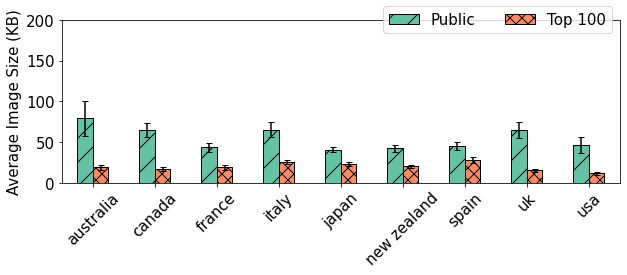

In [217]:
avg_reqs = []
errors = []
avg_reqs_t = []
errors_t = []
for country in countries:
    temp = dfs[country]["details"][dfs[country]["details"]["request_type"]=="Image"]["bytesIn"]/(1024)
    temp2 = dfs_top[country]["details"][dfs_top[country]["details"]["request_type"]=="Image"]["bytesIn"]/(1024)
    mean = temp.mean()
    sigma = temp.std()
    avg_reqs.append(mean)
    
    mean2 = temp2.mean()
    sigma2 = temp2.std()
    avg_reqs_t.append(mean2)
    
    
    errors.append(1.96*sigma/np.sqrt(len(temp)))
    errors_t.append(1.96*sigma2/np.sqrt(len(temp2)))

reqs_df = pd.DataFrame(zip(avg_reqs,avg_reqs_t), index=countries, columns=["Public","Top 100"])
reqs_df

palette = sns.color_palette("Set2")
ax = reqs_df.plot(kind="bar",  color=palette, yerr=[errors,errors_t], rot=45, capsize=3, figsize=(10,3), edgecolor="black", ylim=(0,200))

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(reqs_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_ylabel("Average Image Size (KB)")
ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=2)
plt.savefig("graphs/bytes_per_image_country.png", bbox_inches = 'tight')
plt.savefig("graphs/bytes_per_image_country.eps", bbox_inches = 'tight')

In [218]:
np.mean(reqs_df)

Public     54.855084
Top 100    20.139410
dtype: float64

In [219]:
image_requests_public=0
image_requests_top=0
urls_public=0
urls_top=0
# average image requests per public sites
for country in countries:
  image_requests_public=image_requests_public+ dfs[country]['details']['contentType'].str.contains("image|svg+xml|x-icon",na=False).sum()
  urls_public= urls_public+ dfs[country]['summary']['final_url'].count()

# average image requests per Top 100 sites
for country in countries:
  image_requests_top=image_requests_top+ dfs_top[country]['details']['contentType'].str.contains("image|svg+xml|x-icon",na=False).sum()
  urls_top= urls_top+ dfs_top[country]['summary']['final_url'].count()

avg_public=round(image_requests_public/urls_public)
avg_top=round(image_requests_top/urls_top)

print(avg_public)
print(avg_top)


30
55


In [220]:
# Average image Sizes

avg_size_public=0
url_count_public=0

avg_size_top=0
url_count_top=0

for country in countries:
  avg_size_public=avg_size_public+(dfs[country]['summary']['bytes.image'].sum())/(1024*1024)
  url_count_public=url_count_public+dfs[country]['summary']['final_url'].count()

for country in countries:
  avg_size_top=avg_size_top+(dfs_top[country]['summary']['bytes.image'].sum())/(1024*1024)
  url_count_top=url_count_top+dfs_top[country]['summary']['final_url'].count()

avg_imageSize_public= round((avg_size_public/url_count_public),2)
avg_imageSize_top= round((avg_size_top/url_count_top),2)

print(avg_imageSize_public)
print(avg_imageSize_top)

1.44
0.85


In [221]:
avg_public_perImage=[]
avg_top_perImage=[]
avg_public_perImage.append(round(avg_imageSize_public/avg_public,2))
avg_top_perImage.append(round(avg_imageSize_top/avg_top,2))

fig=go.Figure(data=[
    go.Bar(name="Public",x=['Public'],y=avg_public_perImage,text=avg_public_perImage),
    go.Bar(name="Top 100",x=['Top 100'],y=avg_top_perImage,text=avg_top_perImage)])
fig.update_layout( title="Average Image Size (Public vs Top 100)", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
# fig.update_xaxes(title_text="Public vs Top 100")
fig.update_yaxes(title_text="MBs")
fig.update_yaxes(automargin=True)


fig.show()



In [222]:
# Average Image Sizes per url


avg_imageSize_public=0
count=0
for country in countries:
    avg_imageSize_public=avg_imageSize_public+((dfs[country]['summary']['bytes.image'].sum())/(1024*1024))
    count=count+dfs[country]['summary']['final_url'].count()
    
avg_imageSize_public= round(avg_imageSize_public/count,2)
print(avg_imageSize_public)



avg_imageSize_top=0
count1=0
for country in countries:
    avg_imageSize_top=avg_imageSize_top+((dfs_top[country]['summary']['bytes.image'].sum())/(1024*1024))
    count1=count1+dfs_top[country]['summary']['final_url'].count()
    
avg_imageSize_top= round(avg_imageSize_top/count1,2)
print(avg_imageSize_top)



1.44
0.85


In [223]:
avg_imageSize_publicArray=[]
avg_imageSize_topArray=[]
avg_imageSize_publicArray.append(avg_imageSize_public)
avg_imageSize_topArray.append(avg_imageSize_top)

fig=go.Figure(data=[
    go.Bar(name="Public",x=['Public'],y=avg_imageSize_publicArray,text=avg_imageSize_publicArray),
    go.Bar(name="Top 100",x=['Top 100'],y=avg_imageSize_topArray,text=avg_imageSize_topArray)])
fig.update_layout( title="Average Image Sizes per url (Public vs Top 100)", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
# fig.update_xaxes(title_text="Public vs Top 100")
fig.update_yaxes(title_text="Average Image Sizes (M Bytes) per url")
fig.update_yaxes(automargin=True)


fig.show()



Average Image Size in Public Sites is 3x than Top 100 average image size

In [224]:
res_public = pd.read_csv("/content/drive/MyDrive/ACM_data/resolution_avg_public.csv")

res_public = res_public.set_index("country").drop("Unnamed: 0", axis=1)
res_public = res_public.loc[countries]

res_top = pd.read_csv("/content/drive/MyDrive/ACM_data/resolution_avg_top.csv")
res_top = res_top.set_index("country").drop("Unnamed: 0", axis=1)
res_top = res_top.loc[countries]

In [225]:
res_public

,avg_height,std_height,avg_pixels,std_pixels,avg_width,std_width,count
country,,,,,,,
australia,259.765586,344.137347,299826.749377,1.063185e+06,462.800499,672.107190,802
canada,328.562271,391.888352,429583.692308,1.536661e+06,595.473443,829.584860,1092
france,202.863777,309.531075,204699.959752,1.493558e+06,345.656347,502.832879,969
italy,256.928212,371.779326,299839.582197,1.684835e+06,413.548457,597.477020,1393
japan,164.689256,265.703367,137923.864876,7.044211e+05,334.149174,412.548644,2420
new zealand,291.719203,763.046506,251969.427536,7.837897e+05,476.081522,562.482063,552
spain,190.431479,293.978610,182789.858887,6.022156e+05,326.371777,504.220893,1474
uk,310.808976,480.730541,400189.143843,1.462547e+06,492.128884,712.424580,869
usa,234.169607,314.242411,193327.322931,8.551929e+05,383.225237,476.225060,737


In [226]:
errs = []
heights = res_public.loc[:,["avg_height"]].rename({"avg_height": "Public"}, axis=1).merge(res_top.loc[:,["avg_height"]].rename({"avg_height": "Top 100"}, axis=1),left_index=True, right_index=True)
err = res_public.loc[:,["std_height", "count"]].rename({"std_height": "Public"}, axis=1)
err["Public"] = 1.96  * err["Public"]/np.sqrt(err["count"])
err.drop("count", axis=1, inplace=True)
err2 = res_top.loc[:,["std_height", "count"]].rename({"std_height": "Top 100"}, axis=1)
err2["Top 100"] = 1.96  * err2["Top 100"]/np.sqrt(err2["count"])
err2.drop("count", axis=1, inplace=True)
errs.append(list(err["Public"]))
errs.append(list(err2["Top 100"]))

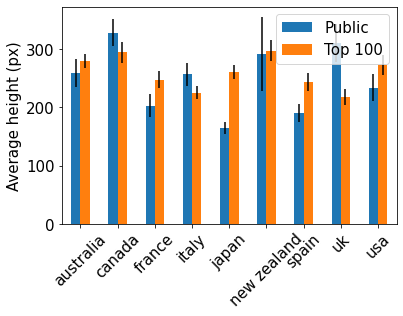

In [227]:
ax = heights.plot(kind="bar", rot=45,ylabel="Average height (px)", yerr=errs, xlabel="")
fig = ax.get_figure()
fig.savefig('graphs/height.png', bbox_inches = 'tight')
fig.savefig('graphs/height.eps', bbox_inches = 'tight')

In [228]:
errs = []
widths = res_public.loc[:,["avg_width"]].rename({"avg_width": "Public"}, axis=1).merge(res_top.loc[:,["avg_width"]].rename({"avg_width": "Top 100"}, axis=1),left_index=True, right_index=True)
err = res_public.loc[:,["std_width", "count"]].rename({"std_width": "Public"}, axis=1)
err["Public"] = 1.96  * err["Public"]/np.sqrt(err["count"])
err.drop("count", axis=1, inplace=True)
err2 = res_top.loc[:,["std_width", "count"]].rename({"std_width": "Top 100"}, axis=1)
err2["Top 100"] = 1.96  * err2["Top 100"]/np.sqrt(err2["count"])
err2.drop("count", axis=1, inplace=True)
errs.append(list(err["Public"]))
errs.append(list(err2["Top 100"]))

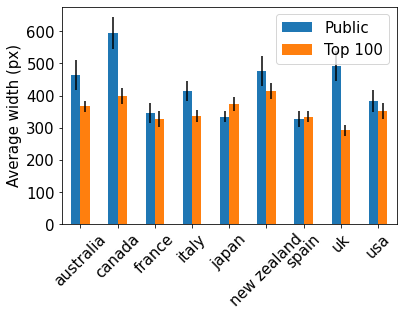

In [229]:
ax = widths.plot(kind="bar", rot=45,ylabel="Average width (px)", yerr=errs, xlabel="")
fig = ax.get_figure()
fig.savefig('graphs/width.png', bbox_inches = 'tight')
fig.savefig('graphs/width.eps', bbox_inches = 'tight')

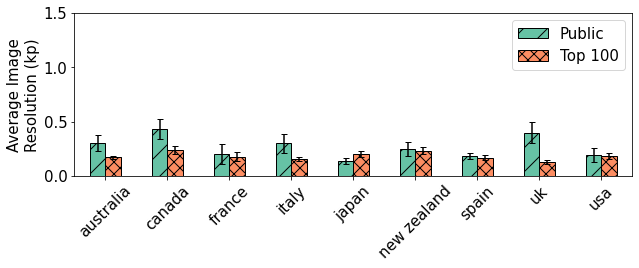

In [230]:
errs = []
pixels = res_public.loc[:,["avg_pixels"]].rename({"avg_pixels": "Public"}, axis=1).merge(res_top.loc[:,["avg_pixels"]].rename({"avg_pixels": "Top 100"}, axis=1),left_index=True, right_index=True)
pixels = pixels/1000000 # kpixels sqaure
err = res_public.loc[:,["std_pixels", "count"]].rename({"std_pixels": "Public"}, axis=1)
err["Public"] = err["Public"]/1000000
err["Public"] = 1.96  * err["Public"]/np.sqrt(err["count"])
err.drop("count", axis=1, inplace=True)
err2 = res_top.loc[:,["std_pixels", "count"]].rename({"std_pixels": "Top 100"}, axis=1)
err2["Top 100"] = err2["Top 100"]/1000000
err2["Top 100"] = 1.96  * err2["Top 100"]/np.sqrt(err2["count"])
err2.drop("count", axis=1, inplace=True)
errs.append(list(err["Public"]))
errs.append(list(err2["Top 100"]))

ax = pixels.plot(kind="bar", rot=45,ylim=(0,1.5),ylabel="Average Image\nResolution (kp)",yerr=errs,  xlabel="", figsize=(10,3), edgecolor="black", capsize=3, color=sns.color_palette("Set2"))

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(pixels))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()
fig = ax.get_figure()
fig.savefig('graphs/pixels.png', bbox_inches = 'tight')
fig.savefig('graphs/pixels.eps', bbox_inches = 'tight')

In [231]:
err2

,Top 100
country,
australia,0.017616
canada,0.033455
france,0.043809
italy,0.019690
japan,0.026041
new zealand,0.033584
spain,0.021792
uk,0.019699
usa,0.025556


In [232]:
diff = pixels["Public"] - pixels["Top 100"]
diff.mean() 

0.08211054810533869

In [233]:
(pixels["Public"]/pixels["Top 100"]).mean()

1.5076639888614163

In [234]:
pixels["Public"].mean()

0.2666832890785795

In [235]:
jquery_public = []
jquery_top = []
jquery = []
public_frameworks = []
top_frameworks = []
frameworks = ['angular', 'jquery', 'node', 'react', 'vue']
for country in countries:
  details = dfs[country]["details"]
  script_details = details[details["request_type"]=="Script"]
  total_scripts = len(script_details)
  jquery_count = 0
  vue_count = 0
  react_count = 0
  node_count = 0
  angular_count = 0
  for i, row in script_details.iterrows():
    if "angular" in row["url"]:
      angular_count+=1
    if "jquery" in row["url"]:
      jquery_count+=1
    if "node" in row["url"]:
      node_count+=1
    if "react" in row["url"]:
      react_count+=1
    if "vue" in row["url"]:
      vue_count+=1
   

  details_top = dfs_top[country]["details"]
  script_details_top = details_top[details_top["request_type"]=="Script"]
  total_scripts_top = len(script_details_top)
  jquery_count_top = 0
  vue_count_top = 0
  react_count_top = 0
  node_count_top = 0
  angular_count_top = 0
  for i, row in script_details_top.iterrows():
    if "angular" in row["url"]:
      angular_count_top+=1
    if "jquery" in row["url"]:
      jquery_count_top+=1
    if "node" in row["url"]:
      node_count_top+=1
    if "react" in row["url"]:
      react_count_top+=1
    if "vue" in row["url"]:
      vue_count_top+=1
  jquery.append([jquery_count*100/total_scripts, jquery_count_top*100/total_scripts_top])

  public_temp = [angular_count, jquery_count, node_count, react_count ,vue_count ]
  public_temp = [p/total_scripts*100 for p in public_temp]
  public_frameworks.append(public_temp)

  top_temp = [angular_count_top, jquery_count_top, node_count_top, react_count_top ,vue_count_top]
  top_temp = [p/total_scripts_top*100 for p in top_temp]
  top_frameworks.append(top_temp)
  # print(total_scripts, jquery_count)

public_frameworks


[[0.0944733112895607,
  7.652338214454417,
  0.04723665564478035,
  0.47236655644780345,
  0.1889466225791214],
 [0.0, 12.020460358056265, 0.042625745950554135, 0.08525149190110827, 0.0],
 [0.0, 19.106881405563687, 0.07320644216691069, 0.0, 0.0],
 [0.5502063273727648,
  12.425492893168272,
  1.3296652911508482,
  0.41265474552957354,
  0.18340210912425492],
 [0.0, 21.99582027168234, 0.0, 0.0, 0.0],
 [0.8747697974217311, 4.465930018416206, 0.0, 0.13812154696132595, 0.0],
 [1.718213058419244,
  13.516609392898053,
  0.11454753722794961,
  0.11454753722794961,
  0.0],
 [0.0, 12.395543175487465, 0.48746518105849584, 0.48746518105849584, 0.0],
 [0.42149631190727077,
  11.380400421496311,
  0.052687038988408846,
  0.4741833508956797,
  0.10537407797681769]]

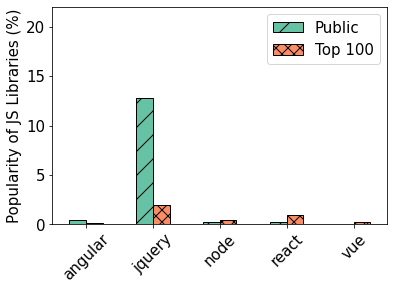

In [236]:
pub_frame = pd.DataFrame(public_frameworks, columns=frameworks, index=countries).mean().to_frame().rename({0:"Public"}, axis=1)
top_frame= pd.DataFrame(top_frameworks, columns=frameworks, index=countries).mean().to_frame().rename({0:"Top 100"}, axis=1)
frame = pub_frame.merge(top_frame, right_index= True, left_index=True)
ax = frame.plot(kind="bar", rot=45,ylabel="Popularity of JS Libraries (%)", color=sns.color_palette("Set2"), ylim=(0,22), edgecolor="black")


bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(frame))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()

fig = ax.get_figure()
fig.savefig('graphs/js_frameworks.png', bbox_inches = 'tight')
fig.savefig('graphs/js_frameworks.eps', bbox_inches = 'tight')

In [237]:
jquery_df = pd.DataFrame(jquery, columns=["Public", "Top 100"], index=countries)

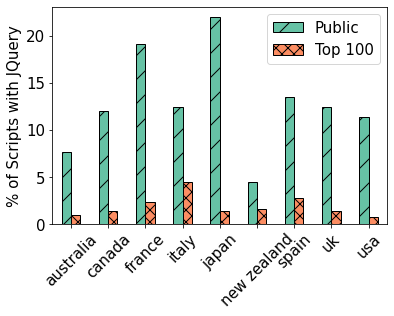

In [238]:
ax = jquery_df.plot(kind="bar", rot=45,ylabel="% of Scripts with JQuery", color=sns.color_palette("Set2"), edgecolor="black")

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(jquery_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()

fig = ax.get_figure()
fig.savefig('graphs/jqeury.png', bbox_inches = 'tight')
fig.savefig('graphs/jquery.eps', bbox_inches = 'tight')

In [239]:
price_baskets = pd.read_excel("/content/drive/MyDrive/ACM_data/ITU_ICTPriceBaskets_2008-2021.xlsx", sheet_name="ICT Price Baskets 2008-2021")
price_baskets = price_baskets[price_baskets["Unit"]=="GNIpc"]
countries = ['australia',
                           'canada',
 'france',
 'italy',
 'japan',
 'new zealand',
 'spain',
 'uk',
 'usa']
basket_countries = ["Australia", "Canada", "France", "Italy", "Japan", "New Zealand", "Spain", "United Kingdom", "United States"]
dataonly =[]
data_voice_low = []
data_voice_high = []
year = 2020  # chose 2020 as yemen data not available for 2021
for country in basket_countries:
  country_data = price_baskets[price_baskets["Economy"]==country]
  dataonly.append(country_data[country_data["basket_combined_simplified"]=="Data-only mobile-broadband basket"][year].iloc[0])
  print(country + ":", country_data[country_data["basket_combined_simplified"]=="Data-only mobile-broadband basket"][year].iloc[0])
  # data_voice_low = []
  data_voice_low.append(country_data[country_data["basket_combined_simplified"]=="Mobile data and voice low-consumption basket"][year].iloc[0])
  # data_voice_high = []
  data_voice_high.append(country_data[country_data["basket_combined_simplified"]=="Mobile data and voice high-consumption basket"][year].iloc[0])

dataonly, data_voice_low, data_voice_high

# country_data[country_data["basket_combined_simplified"]=="Mobile-cellular low-usage basket"][2021]


Australia: 0.81
Canada: 0.67
France: 0.49
Italy: 0.4
Japan: 1.16
New Zealand: 0.37
Spain: 0.31
United Kingdom: 0.55
United States: 0.4


([0.81, 0.67, 0.49, 0.4, 1.16, 0.37, 0.31, 0.55, 0.4],
 [0.81, 1.69, 0.55, 0.8, 1.09, 0.31, 0.54, 0.59, 0.59],
 [0.81, 1.69, 0.88, 0.8, 1.42, 0.41, 1.03, 0.7, 0.79])

In [240]:
PAW_dfs = {}
PAW_dfs["Data only"] = page_size_df.copy()
PAW_dfs["Data low"] = page_size_df.copy()
PAW_dfs["Data high"] = page_size_df.copy()

In [241]:
types = ["Public", "Top 100"]
i = 0
for country in countries:
  for t in types:
    PAW_dfs["Data only"].loc[country, t] = PAW_dfs["Data only"].loc[country, t]/2.15 * (dataonly[i]/2)
    PAW_dfs["Data low"].loc[country, t] = PAW_dfs["Data low"].loc[country, t]/2.15 * (data_voice_low[i]/2)
    PAW_dfs["Data high"].loc[country, t] = PAW_dfs["Data high"].loc[country, t]/2.15 * (data_voice_high[i]/2)
  i+=1

In [242]:
PAW_dfs["Data only"]

,Public,Top 100
australia,0.559141,0.510835
canada,0.431112,0.304417
france,0.220616,0.229399
italy,0.323478,0.186281
japan,0.809331,0.689406
new zealand,0.189501,0.225304
spain,0.209536,0.264263
uk,0.256549,0.241079
usa,0.239312,0.219253


In [243]:
PAW_dfs["Data low"]

,Public,Top 100
australia,0.559141,0.510835
canada,1.087432,0.767859
france,0.247631,0.257489
italy,0.646956,0.372563
japan,0.760492,0.647804
new zealand,0.158771,0.188768
spain,0.364999,0.460329
uk,0.275207,0.258612
usa,0.352985,0.323398


In [244]:
PAW_dfs["Data high"]

,Public,Top 100
australia,0.559141,0.510835
canada,1.087432,0.767859
france,0.396209,0.411982
italy,0.646956,0.372563
japan,0.990732,0.843928
new zealand,0.209987,0.249662
spain,0.696201,0.878036
uk,0.326516,0.306827
usa,0.472641,0.433025


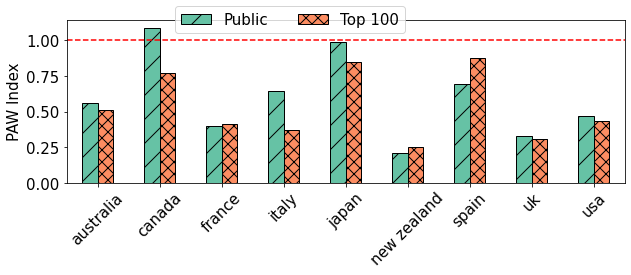

In [245]:
# High data
ax = PAW_dfs["Data high"].plot(kind="bar",rot=45, ylabel="PAW Index",color=sns.color_palette("Set2"),edgecolor="black", figsize=(10,3))
plt.axhline(y=1, color='r', linestyle='--' )
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(jquery_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()
ax.legend(loc='center', bbox_to_anchor=(0.4,1), ncol=2)
plt.savefig("graphs/paw_highd.png", bbox_inches = 'tight')
plt.savefig("graphs/paw_highd.eps", bbox_inches = 'tight')

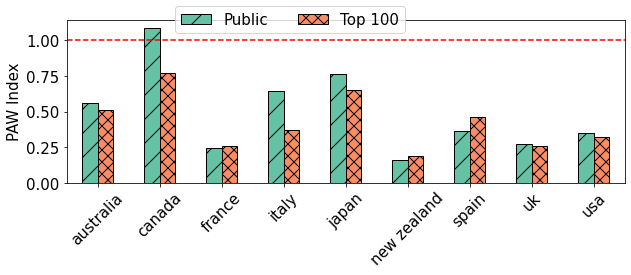

In [246]:
ax = PAW_dfs["Data low"].plot(kind="bar",rot=45, ylabel="PAW Index",color=sns.color_palette("Set2"),edgecolor="black", figsize=(10,3))
plt.axhline(y=1, color='r', linestyle='--' )
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(jquery_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()
ax.legend(loc='center', bbox_to_anchor=(0.4,1), ncol=2)
plt.savefig("graphs/paw_lowd.png", bbox_inches = 'tight')
plt.savefig("graphs/paw_lowd.eps", bbox_inches = 'tight')

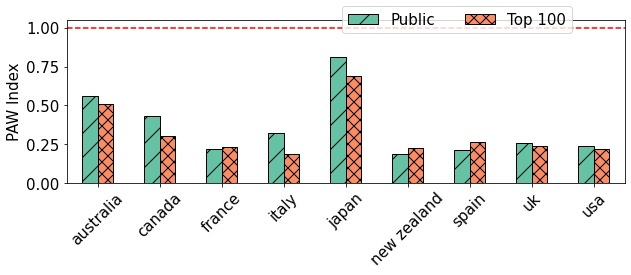

In [247]:
ax = PAW_dfs["Data only"].plot(kind="bar",rot=45, ylabel="PAW Index",color=sns.color_palette("Set2"),edgecolor="black", figsize=(10,3))
plt.axhline(y=1, color='r', linestyle='--' )
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(jquery_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()
ax.legend(loc='center', bbox_to_anchor=(0.7,1), ncol=2)
plt.savefig("graphs/paw_only.png", bbox_inches = 'tight')
plt.savefig("graphs/paw_only.eps", bbox_inches = 'tight')

In [248]:
!zip -r /content/graphs.zip /content/graphs

updating: content/graphs/ (stored 0%)
updating: content/graphs/pixels.png (deflated 8%)
updating: content/graphs/reqs_country.eps (deflated 73%)
updating: content/graphs/total_image_reqs.eps (deflated 73%)
updating: content/graphs/reqs_country.png (deflated 8%)
updating: content/graphs/bytes_per_image_country.png (deflated 8%)
updating: content/graphs/page_size.eps (deflated 72%)
updating: content/graphs/type_bytes.eps (deflated 70%)
updating: content/graphs/format_bytes.eps (deflated 69%)
updating: content/graphs/type_reqs.png (deflated 5%)
updating: content/graphs/paw_highd.eps (deflated 73%)
updating: content/graphs/paw_lowd.eps (deflated 73%)
updating: content/graphs/perc_bytes.eps (deflated 71%)
updating: content/graphs/page_size.png (deflated 7%)
updating: content/graphs/paw_only.png (deflated 8%)
updating: content/graphs/width.eps (deflated 71%)
updating: content/graphs/reqs_total_image_country.png (deflated 7%)
updating: content/graphs/bytes_total_image_country.eps (deflated 72